# **Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
import joblib



In [2]:
# Import necessary library
from zipfile import ZipFile
import os

zip_file_path = 'f1.zip'
extract_folder = 'f1'

os.makedirs(extract_folder, exist_ok=True)

# Unzip the file
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)
    print(f"Files extracted to: {extract_folder}")

extracted_files = os.listdir(extract_folder)
print("\nExtracted files:")
for file in extracted_files:
    print(file)

# Verify the important files are present
required_files = {'train.csv', 'test.csv', 'sample_submission.csv'}
if required_files.issubset(set(extracted_files)):
    print("\nAll required files found! You can proceed with the analysis.")
else:
    missing_files = required_files - set(extracted_files)
    print(f"\nWarning: Missing files - {missing_files}")

Files extracted to: f1

Extracted files:
validation.csv
test.csv
train.csv
sample_submission.csv

All required files found! You can proceed with the analysis.


In [3]:
# np.random.seed(42)

# Load the datasets
train_df = pd.read_csv('f1/train.csv')
test_df = pd.read_csv('f1/test.csv')
sample_submission = pd.read_csv('f1/sample_submission.csv')

# Display basic info
print("Training Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)
print("\nTraining Data Columns:\n", train_df.columns.tolist())
print("\nMissing Values in Training Data:\n", train_df.isnull().sum().sort_values(ascending=False))

<ipython-input-3-45843675>:4: DtypeWarning: Columns (4,13,14,16,47) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('f1/train.csv')
<ipython-input-3-45843675>:5: DtypeWarning: Columns (13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv('f1/test.csv')


Training Data Shape: (2830101, 55)
Test Data Shape: (352928, 53)

Training Data Columns:
 ['resultId', 'racerId', 'driverId', 'constructorId', 'number', 'grid', 'position_x', 'positionText_x', 'positionOrder', 'points', 'laps', 'time_x', 'timetaken_in_millisec', 'fastestLap', 'rank', 'fastestLapTime', 'max_speed', 'statusId', 'year', 'round', 'circuitId', 'grand_prix', 'date', 'time_y', 'url_x', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'driverRef', 'driver_num', 'driver_code', 'forename', 'surname', 'dob', 'nationality', 'url_y', 'driverStandingsId', 'raceId_y', 'points_y', 'position', 'positionText_y', 'wins', 'constructorRef', 'company', 'nationality_y', 'url', 'status', 'result_driver_standing']

Missing Values in Training Data:
 resultId                  0
racerId                   0
driverId                  0
constructorId             0
number                    0
grid                      0


In [ ]:
train_df.head(100)

resultId  racerId  driverId  constructorId number  grid position_x  \
0      20025      833       642             51      2     1          1   
1      20025      833       642             51      2     1          1   
2      20025      833       642             51      2     1          1   
3      20025      833       642             51      2     1          1   
4      20025      833       642             51      2     1          1   
..       ...      ...       ...            ...    ...   ...        ...   
95     20028      833       704            154     14     6          4   
96     20028      833       704            154     14     6          4   
97     20028      833       704            154     14     6          4   
98     20028      833       704            154     14     6          4   
99     20028      833       704            154     14     6          4   

   positionText_x  positionOrder  points  ...  points_y position  \
0               1              1     9.0  ...      3.33        3   
1               1              1     9.0  ...      6.33        3   
2               1              1     9.0  ...      6.33        4   
3               1              1     9.0  ...     10.33        3   
4               1              1     9.0  ...     10.33        4   
..            ...            ...     ...  ...       ...      ...   
95              4              4     3.0  ...      2.00       16   
96              4              4     3.0  ...      2.00       16   
97              4              4     3.0  ...      2.00       16   
98              4              4     3.0  ...      2.00       17   
99              4              4     3.0  ...      3.00        4   

   positionText_y wins constructorRef      company nationality_y  \
0               3    0           alfa   Alfa Romeo         Swiss   
1               3    0           alfa   Alfa Romeo         Swiss   
2               4    0           alfa   Alfa Romeo         Swiss   
3               3    0           alfa   Alfa Romeo         Swiss   
4               4    0           alfa   Alfa Romeo         Swiss   
..            ...  ...            ...          ...           ...   
95             16    0           lago  Talbot-Lago        French   
96             16    0           lago  Talbot-Lago        French   
97             16    0           lago  Talbot-Lago        French   
98             17    0           lago  Talbot-Lago        French   
99              4    0           lago  Talbot-Lago        French   

                                                  url    status  \
0   http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...  Finished   
1   http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...  Finished   
2   http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...  Finished   
3   http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...  Finished   
4   http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...  Finished   
..                                                ...       ...   
95           http://en.wikipedia.org/wiki/Talbot-Lago   +2 Laps   
96           http://en.wikipedia.org/wiki/Talbot-Lago   +2 Laps   
97           http://en.wikipedia.org/wiki/Talbot-Lago   +2 Laps   
98           http://en.wikipedia.org/wiki/Talbot-Lago   +2 Laps   
99           http://en.wikipedia.org/wiki/Talbot-Lago   +2 Laps   

    result_driver_standing  
0                922731975  
1                923172525  
2                923833350  
3                925195050  
4                926576775  
..                     ...  
95               877927380  
96               879409452  
97               880951608  
98               882553848  
99               865289712  

[100 rows x 55 columns]

In [ ]:
test_df.head(100)

resultId  racerId  driverId  constructorId  number  grid position_x  \
0      23949      997         4              1      14    13          8   
1      23949      997         4              1      14    13          8   
2      23949      997         4              1      14    13          8   
3      23949      997         4              1      14    13          8   
4      23949      997         4              1      14    13          8   
..       ...      ...       ...            ...     ...   ...        ...   
95     23949      997         4              1      14    13          8   
96     23949      997         4              1      14    13          8   
97     23949      997         4              1      14    13          8   
98     23949      997         4              1      14    13          8   
99     23949      997         4              1      14    13          8   

   positionText_x  positionOrder  points  ...  driverStandingsId raceId_y  \
0               8              8     4.0  ...              12474       93   
1               8              8     4.0  ...              12494       94   
2               8              8     4.0  ...              12514       95   
3               8              8     4.0  ...              12534       96   
4               8              8     4.0  ...              12554       97   
..            ...            ...     ...  ...                ...      ...   
95              8              8     4.0  ...              64459      845   
96              8              8     4.0  ...              64483      846   
97              8              8     4.0  ...              64507      847   
98              8              8     4.0  ...              64532      848   
99              8              8     4.0  ...              64557      849   

   points_y wins  constructorRef  company nationality_y  \
0      16.0    0         mclaren  McLaren       British   
1      21.0    0         mclaren  McLaren       British   
2      21.0    0         mclaren  McLaren       British   
3      25.0    0         mclaren  McLaren       British   
4      25.0    0         mclaren  McLaren       British   
..      ...  ...             ...      ...           ...   
95     51.0    0         mclaren  McLaren       British   
96     69.0    0         mclaren  McLaren       British   
97     69.0    0         mclaren  McLaren       British   
98     87.0    0         mclaren  McLaren       British   
99    112.0    1         mclaren  McLaren       British   

                                     url  status  result_driver_standing  
0   http://en.wikipedia.org/wiki/McLaren  +1 Lap               298739826  
1   http://en.wikipedia.org/wiki/McLaren  +1 Lap               299218806  
2   http://en.wikipedia.org/wiki/McLaren  +1 Lap               299697786  
3   http://en.wikipedia.org/wiki/McLaren  +1 Lap               300176766  
4   http://en.wikipedia.org/wiki/McLaren  +1 Lap               300655746  
..                                   ...     ...                     ...  
95  http://en.wikipedia.org/wiki/McLaren  +1 Lap              1543728591  
96  http://en.wikipedia.org/wiki/McLaren  +1 Lap              1544303367  
97  http://en.wikipedia.org/wiki/McLaren  +1 Lap              1544878143  
98  http://en.wikipedia.org/wiki/McLaren  +1 Lap              1545476868  
99  http://en.wikipedia.org/wiki/McLaren  +1 Lap              1546075593  

[100 rows x 53 columns]

In [ ]:
sample_submission.head()

position  result_driver_standing
0         5               298739826
1         4               299218806
2         6               299697786
3         5               300176766
4         5               300655746

In [ ]:
train_df.shape

(2830101, 55)

In [ ]:
test_df.shape

(352928, 53)

In [ ]:
sample_submission.shape

(18, 2)

            resultId       racerId      driverId  constructorId     number  \
count   2.830101e+06  2.830101e+06  2.830101e+06   2.830101e+06  2830101.0   
unique           NaN           NaN           NaN            NaN      186.0   
top              NaN           NaN           NaN            NaN        1.0   
freq             NaN           NaN           NaN            NaN   159449.0   
mean    9.787394e+03  3.963803e+02  1.380708e+02   3.360054e+01        NaN   
std     6.597046e+03  2.523813e+02  1.618397e+02   4.787091e+01        NaN   
min     1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00        NaN   
25%     3.896000e+03  1.810000e+02  2.200000e+01   6.000000e+00        NaN   
50%     9.179000e+03  3.730000e+02  9.500000e+01   1.700000e+01        NaN   
75%     1.487100e+04  5.720000e+02  1.850000e+02   3.400000e+01        NaN   
max     2.430500e+04  8.990000e+02  8.240000e+02   2.080000e+02        NaN   

                grid position_x positionText_x  positionOrder  

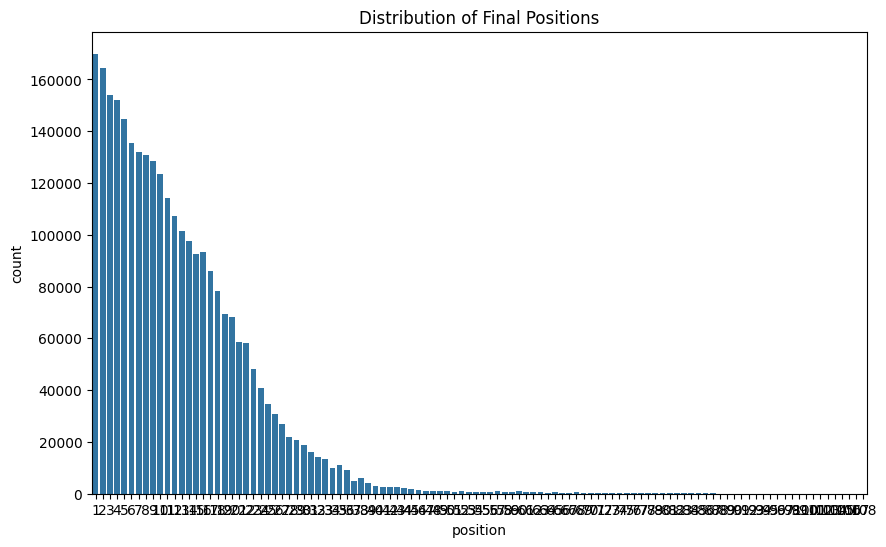

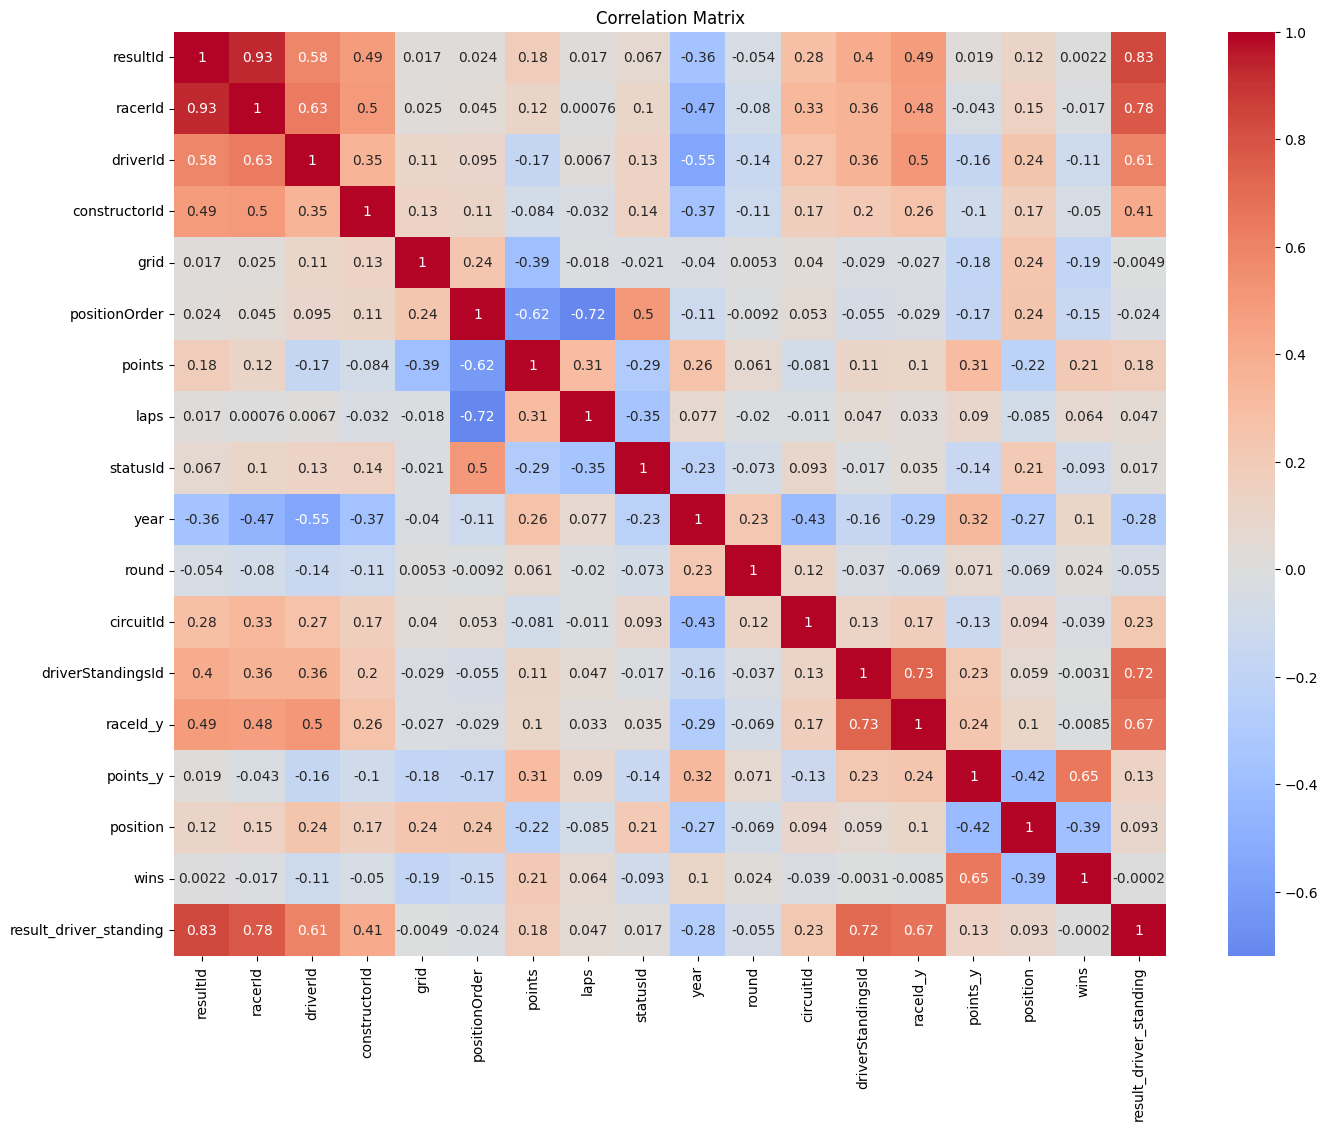

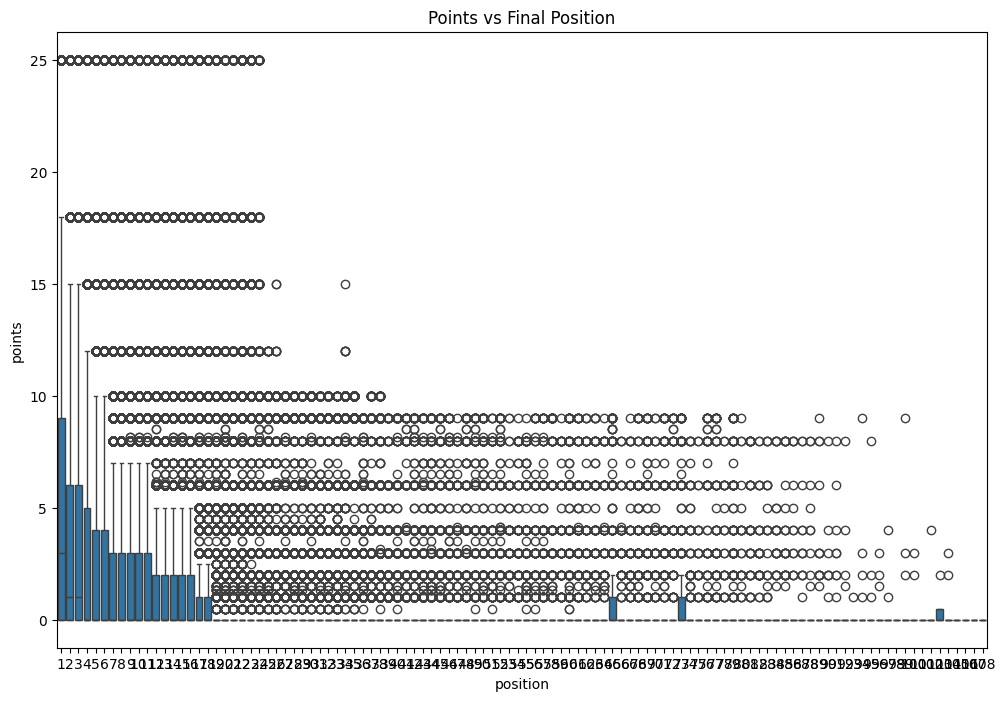

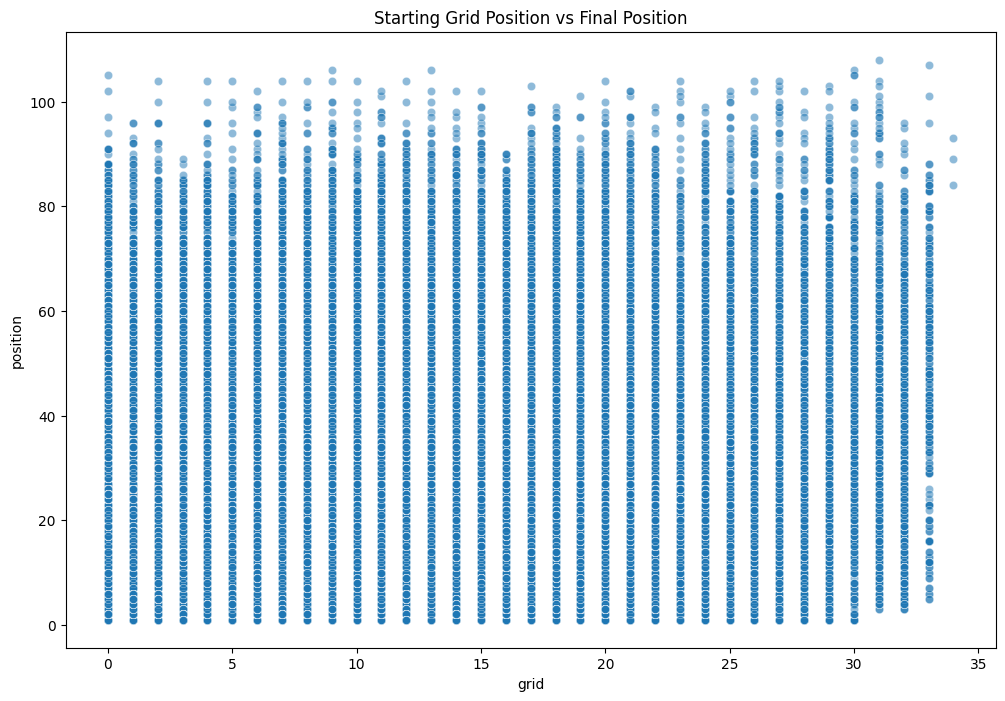

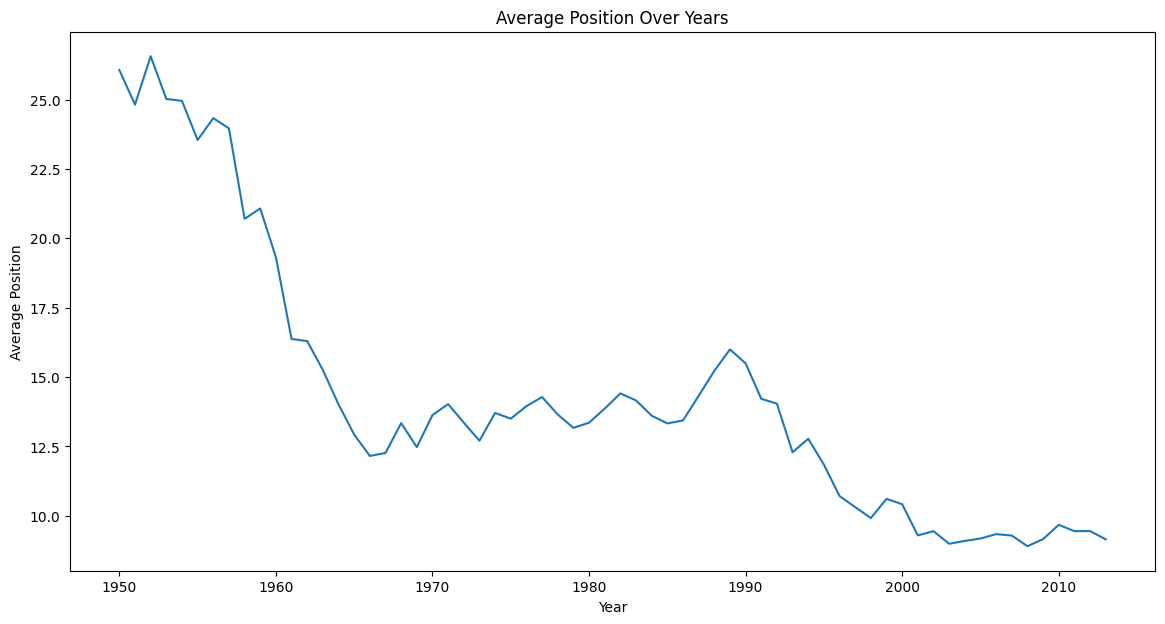

In [ ]:
print(train_df.describe(include='all'))

# Target variable distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='position', data=train_df)
plt.title('Distribution of Final Positions')
plt.show()

# Correlation analysis
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = train_df[numerical_cols].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Key relationships
plt.figure(figsize=(12, 8))
sns.boxplot(x='position', y='points', data=train_df)
plt.title('Points vs Final Position')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='grid', y='position', data=train_df, alpha=0.5)
plt.title('Starting Grid Position vs Final Position')
plt.show()

# Time series analysis of performance
plt.figure(figsize=(14, 7))
train_df.groupby('year')['position'].mean().plot()
plt.title('Average Position Over Years')
plt.ylabel('Average Position')
plt.xlabel('Year')
plt.show()

In [ ]:
#Setting Up Our Predictors and Target

print("Setting up our data for modeling...\n")

# We're predicting the final race position ('position')
X = train_df.drop(['position', 'positionText_y'], axis=1)
y = train_df['position']

print(f"Original number of features: {X.shape[1]}")
print(f"Target variable: 'position' with {len(y.unique())} unique positions\n")

Setting up our data for modeling...

Original number of features: 53
Target variable: 'position' with 108 unique positions



In [ ]:
# Understanding Our Feature Types

print("Identifying different types of features...")

# Find numeric columns (numbers)
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
print(f"\nFound {len(numerical_features)} numeric features:")
print(numerical_features.tolist())

# Find categorical columns (text)
categorical_features = X.select_dtypes(include=['object']).columns
print(f"\nFound {len(categorical_features)} categorical features:")
print(categorical_features.tolist())

Identifying different types of features...

Found 17 numeric features:
['resultId', 'racerId', 'driverId', 'constructorId', 'grid', 'positionOrder', 'points', 'laps', 'statusId', 'year', 'round', 'circuitId', 'driverStandingsId', 'raceId_y', 'points_y', 'wins', 'result_driver_standing']

Found 36 categorical features:
['number', 'position_x', 'positionText_x', 'time_x', 'timetaken_in_millisec', 'fastestLap', 'rank', 'fastestLapTime', 'max_speed', 'grand_prix', 'date', 'time_y', 'url_x', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'driverRef', 'driver_num', 'driver_code', 'forename', 'surname', 'dob', 'nationality', 'url_y', 'constructorRef', 'company', 'nationality_y', 'url', 'status']


In [ ]:
# Removing Non-Predictive Columns

print("\nCleaning our data by removing columns that won't help with predictions...")

cols_to_drop = [
    'resultId', 'racerId', 'driverId', 'constructorId',
    'url_x', 'url_y', 'url', 'driverStandingsId',
    'raceId_y', 'result_driver_standing',
    'driverRef', 'constructorRef','position_x',
    'timetaken_in_millisec','time_y','fp1_date','fp2_date','fp2_time','fp3_date',
    'fp3_time','quali_date','quali_time','sprint_date','sprint_time','dob'
]

print(f"\nDropping {len(cols_to_drop)} columns that won't help our model:")
print(cols_to_drop)

X = X.drop(cols_to_drop, axis=1, errors='ignore')

print(f"\nRemaining columns after cleaning ({len(X.columns)}):")
print(X.columns.tolist())

accidentally_kept = set(cols_to_drop) & set(X.columns)
if accidentally_kept:
    print("\nThese columns were not dropped:")
    print(accidentally_kept)
else:
    print("\n removed.")


Cleaning our data by removing columns that won't help with predictions...

Dropping 25 columns that won't help our model:
['resultId', 'racerId', 'driverId', 'constructorId', 'url_x', 'url_y', 'url', 'driverStandingsId', 'raceId_y', 'result_driver_standing', 'driverRef', 'constructorRef', 'position_x', 'timetaken_in_millisec', 'time_y', 'fp1_date', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'dob']

Remaining columns after cleaning (28):
['number', 'grid', 'positionText_x', 'positionOrder', 'points', 'laps', 'time_x', 'fastestLap', 'rank', 'fastestLapTime', 'max_speed', 'statusId', 'year', 'round', 'circuitId', 'grand_prix', 'date', 'fp1_time', 'driver_num', 'driver_code', 'forename', 'surname', 'nationality', 'points_y', 'wins', 'company', 'nationality_y', 'status']

 removed.


In [ ]:
# ==============================================
# STEP 4: Checking What's Left After Cleaning
# ==============================================

print("\nAfter cleaning, here's what we have left:")

# Updated feature lists
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

print(f"\nRemaining numeric features ({len(numerical_features)}):")
print(numerical_features.tolist())

print(f"\nRemaining categorical features ({len(categorical_features)}):")
print(categorical_features.tolist())

# Show detailed info about remaining columns
print("\nDetailed information about remaining columns:")
print(X.info())


After cleaning, here's what we have left:

Remaining numeric features (10):
['grid', 'positionOrder', 'points', 'laps', 'statusId', 'year', 'round', 'circuitId', 'points_y', 'wins']

Remaining categorical features (18):
['number', 'positionText_x', 'time_x', 'fastestLap', 'rank', 'fastestLapTime', 'max_speed', 'grand_prix', 'date', 'fp1_time', 'driver_num', 'driver_code', 'forename', 'surname', 'nationality', 'company', 'nationality_y', 'status']

Detailed information about remaining columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830101 entries, 0 to 2830100
Data columns (total 28 columns):
 #   Column          Dtype  
---  ------          -----  
 0   number          object 
 1   grid            int64  
 2   positionText_x  object 
 3   positionOrder   int64  
 4   points          float64
 5   laps            int64  
 6   time_x          object 
 7   fastestLap      object 
 8   rank            object 
 9   fastestLapTime  object 
 10  max_speed       object 
 11  status

In [ ]:
# ==============================================
# STEP 5: Setting Up Data Preprocessing
# ==============================================

print("\nSetting up our data preprocessing pipelines...")

# For numbers:
# 1. Fill missing values with median
# 2. Scale values to similar ranges
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# For text/categories:
# 1. Fill missing values with most frequent category
# 2. Convert to numeric codes (one-hot encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Preprocessing pipeline created successfully!")


Setting up our data preprocessing pipelines...
Preprocessing pipeline created successfully!


In [ ]:
# ==============================================
# STEP 6: Creating New Helpful Features (Updated without dob)
# ==============================================

print("\nCreating new features that might help predictions...")

def engineer_features(df):
    """Adds new calculated features to our dataset (without dob column)"""

    print("\nOriginal shape before engineering:", df.shape)
    df = df.copy()  # Create a copy to avoid modifying original

    # 1. How many races the driver has participated in
    if 'forename' in df.columns and 'year' in df.columns:
        print("- Calculating driver experience...")
        df['driver_experience'] = df.groupby('forename')['year'].rank(method='dense')
    else:
        print("- Skipping driver_experience: 'forename' or 'year' columns not found")

    # 2. How long the team has been racing
    if 'company' in df.columns and 'year' in df.columns:
        print("- Calculating team experience...")
        df['team_experience'] = df.groupby('company')['year'].rank(method='dense')
    else:
        print("- Skipping team_experience: 'company' or 'year' columns not found")

    # 3. Difference between qualifying and grid position
    if 'grid' in df.columns and 'positionOrder' in df.columns:
        print("- Calculating qualifying performance...")
        df['qualifying_gap'] = df['grid'] - df['positionOrder']
    else:
        print("- Skipping qualifying_gap: 'grid' or 'positionOrder' columns not found")

    # 4. How many times driver raced on this track
    if 'forename' in df.columns and 'circuitId' in df.columns and 'year' in df.columns:
        print("- Calculating track familiarity...")
        df['track_familiarity'] = df.groupby(['forename', 'circuitId'])['year'].rank(method='dense')
    else:
        print("- Skipping track_familiarity: required columns not found")

    print("\nNew features successfully added:")
    new_features = ['driver_experience', 'team_experience',
                   'qualifying_gap', 'track_familiarity']
    for feat in new_features:
        if feat in df.columns:
            print(f"- {feat}")

    print("\nShape after engineering:", df.shape)
    return df

# Apply our feature engineering
print("\nApplying feature engineering to our data...")
X = engineer_features(X)

# Show the first few rows with our new features
print("\nPreview of data with new features:")
print(X[['forename', 'surname', 'driver_experience',
         'team_experience', 'qualifying_gap', 'track_familiarity']].head())


Creating new features that might help predictions...

Applying feature engineering to our data...

Original shape before engineering: (2830101, 28)
- Calculating driver experience...
- Calculating team experience...
- Calculating qualifying performance...
- Calculating track familiarity...

New features successfully added:
- driver_experience
- team_experience
- qualifying_gap
- track_familiarity

Shape after engineering: (2830101, 32)

Preview of data with new features:
  forename surname  driver_experience  team_experience  qualifying_gap  \
0     Nino  Farina                1.0              1.0               0   
1     Nino  Farina                1.0              1.0               0   
2     Nino  Farina                1.0              1.0               0   
3     Nino  Farina                1.0              1.0               0   
4     Nino  Farina                1.0              1.0               0   

   track_familiarity  
0                1.0  
1                1.0  
2        

# ANALYSIS


Remaining columns after cleaning (32):
['number', 'grid', 'positionText_x', 'positionOrder', 'points', 'laps', 'time_x', 'fastestLap', 'rank', 'fastestLapTime', 'max_speed', 'statusId', 'year', 'round', 'circuitId', 'grand_prix', 'date', 'fp1_time', 'driver_num', 'driver_code', 'forename', 'surname', 'nationality', 'points_y', 'wins', 'company', 'nationality_y', 'status', 'driver_experience', 'team_experience', 'qualifying_gap', 'track_familiarity']

All specified columns were successfully removed.

Analyzing 32 remaining columns:

 number 
Type: object
Unique values: 186


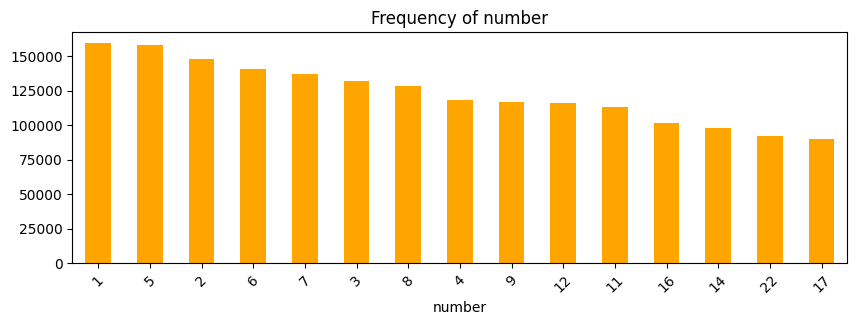


 grid 
Type: int64
Min: 0.00
Max: 34.00
Mean: 9.93
Median: 9.00


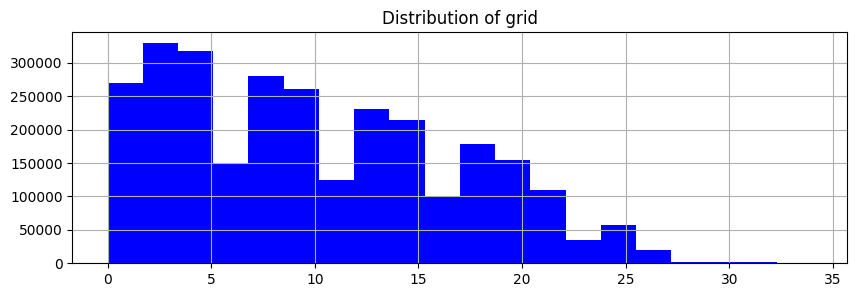


 positionText_x 
Type: object
Unique values: 39


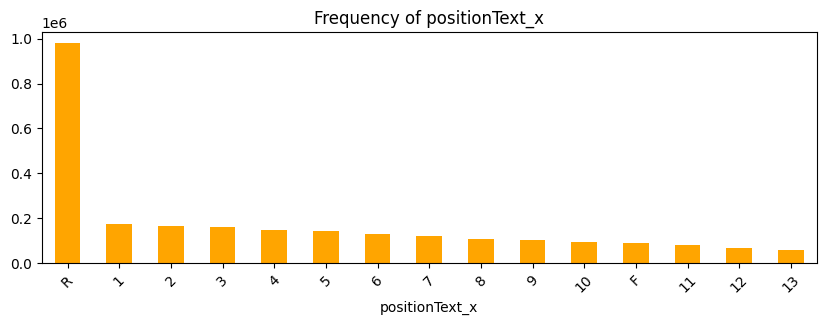


 positionOrder 
Type: int64
Min: 1.00
Max: 39.00
Mean: 11.66
Median: 11.00


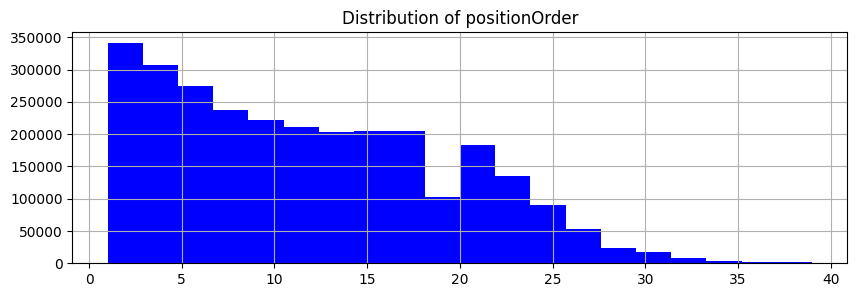


 points 
Type: float64
Min: 0.00
Max: 25.00
Mean: 2.13
Median: 0.00


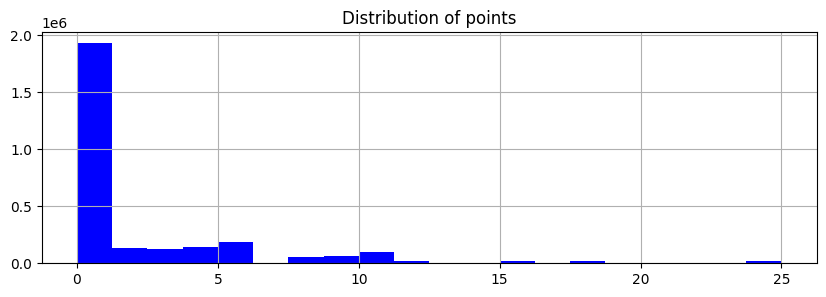


 laps 
Type: int64
Min: 0.00
Max: 200.00
Mean: 46.96
Median: 53.00


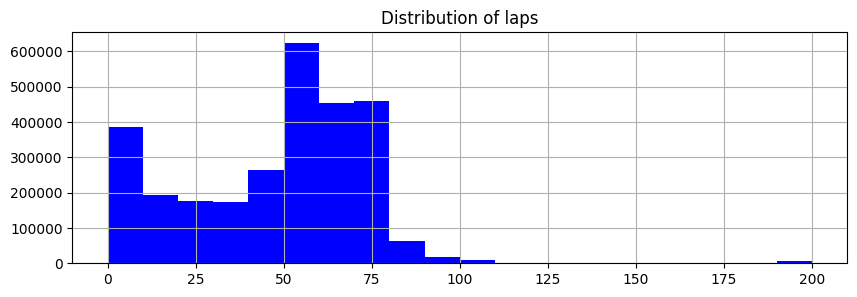


 time_x 
Type: object
Unique values: 5077


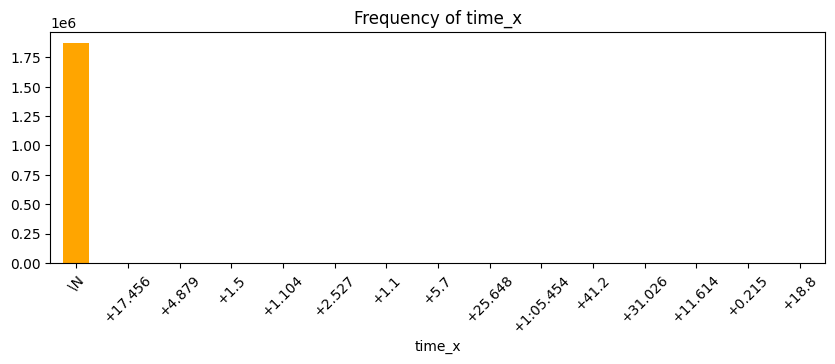


 fastestLap 
Type: object
Unique values: 142


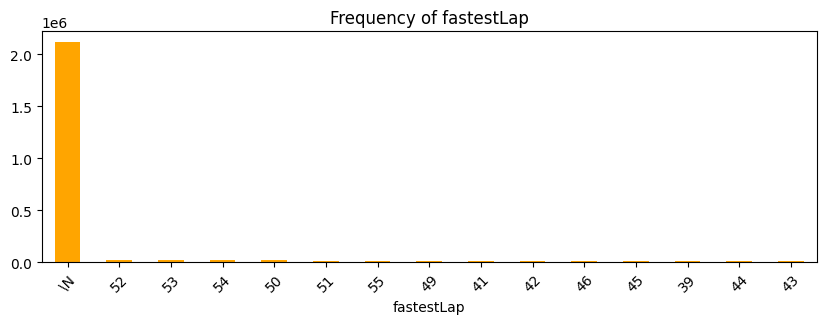


 rank 
Type: object
Unique values: 50


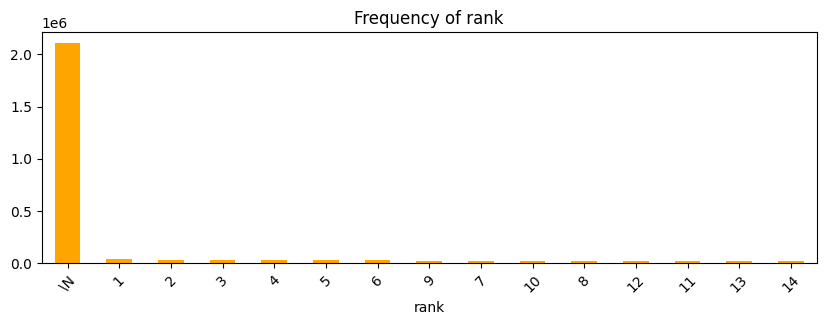


 fastestLapTime 
Type: object
Unique values: 3639


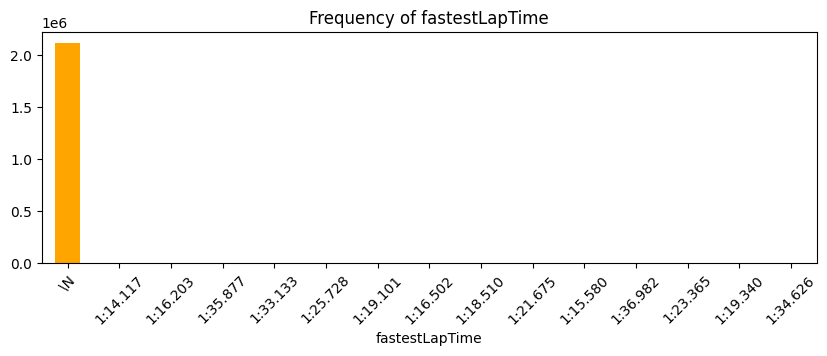


 max_speed 
Type: object
Unique values: 3721


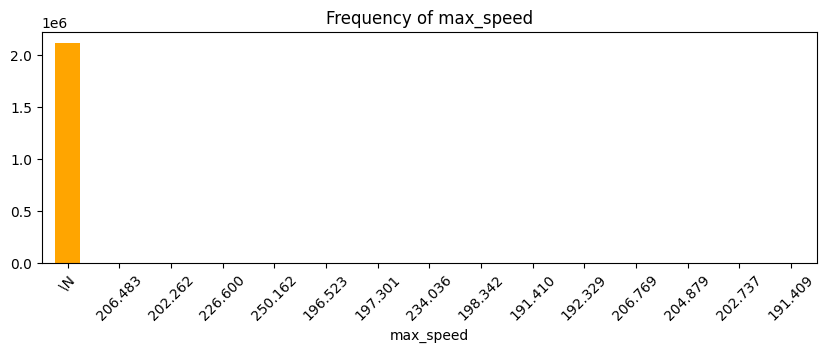


 statusId 
Type: int64
Min: 1.00
Max: 130.00
Mean: 14.15
Median: 6.00


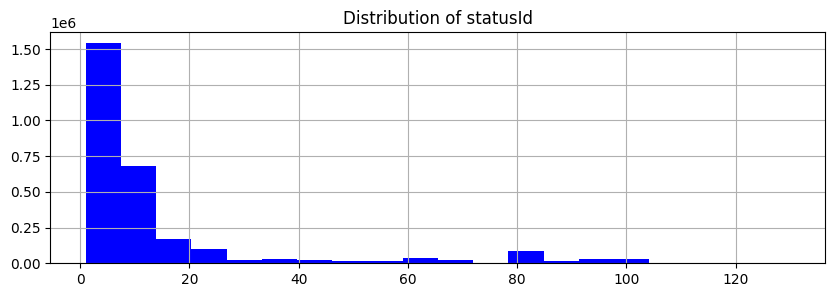


 year 
Type: int64
Min: 1950.00
Max: 2013.00
Mean: 1991.02
Median: 1992.00


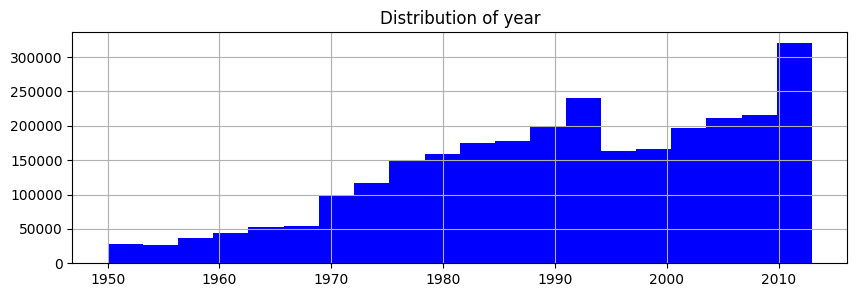


 round 
Type: int64
Min: 1.00
Max: 20.00
Mean: 8.46
Median: 8.00


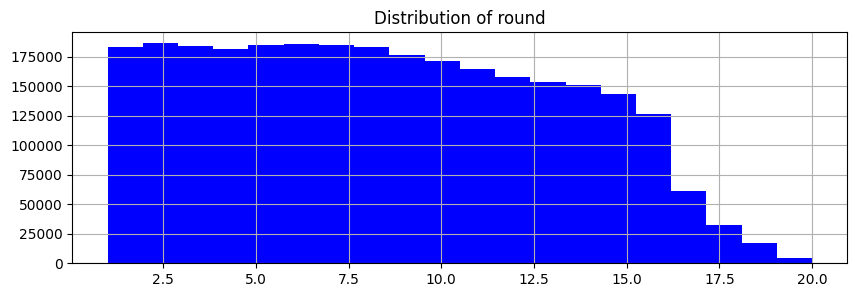


 circuitId 
Type: int64
Min: 1.00
Max: 70.00
Mean: 21.10
Median: 17.00


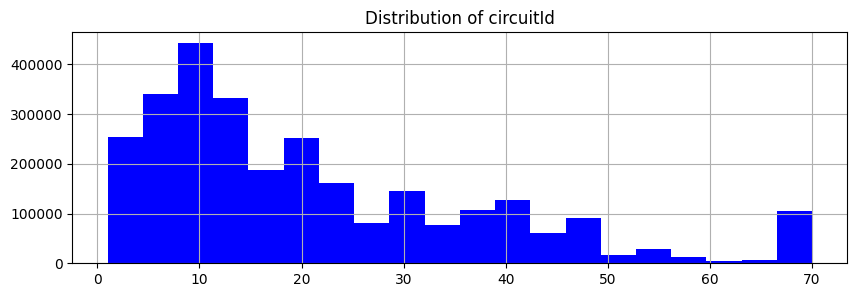


 grand_prix 
Type: object
Unique values: 40


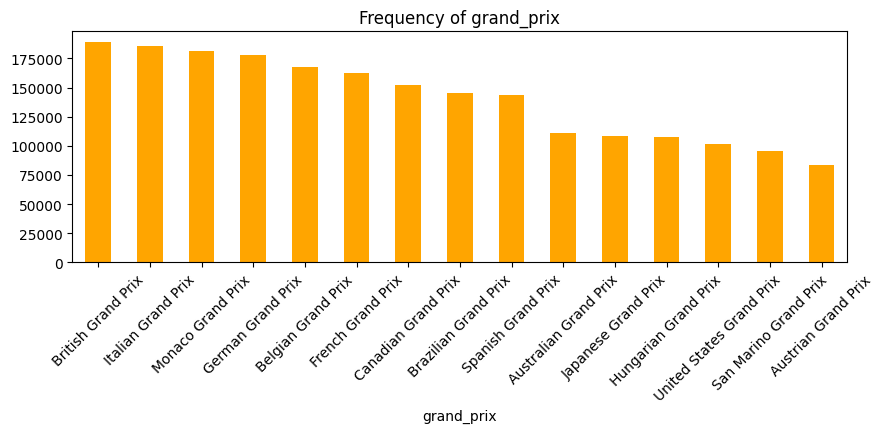


 date 
Type: object
Unique values: 897


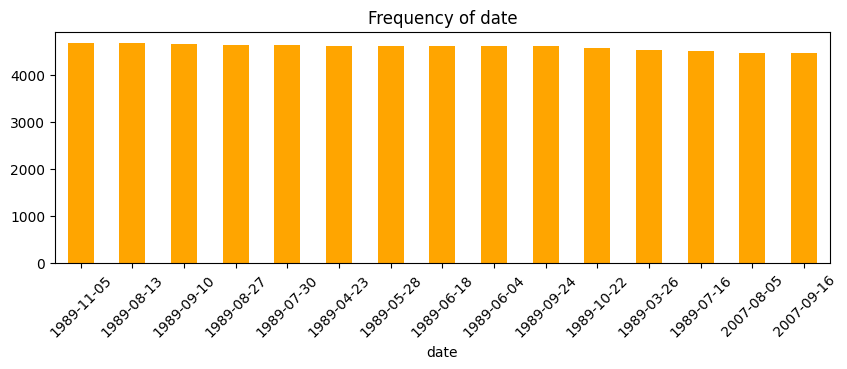


 fp1_time 
Type: object
Unique values: 1
Sample values: ['\\N']


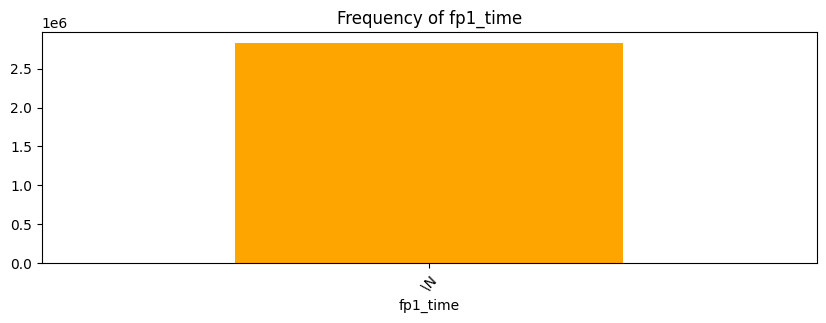


 driver_num 
Type: object
Unique values: 21


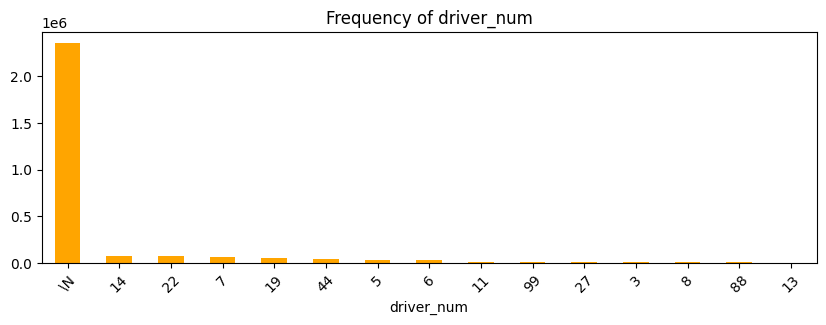


 driver_code 
Type: object
Unique values: 65


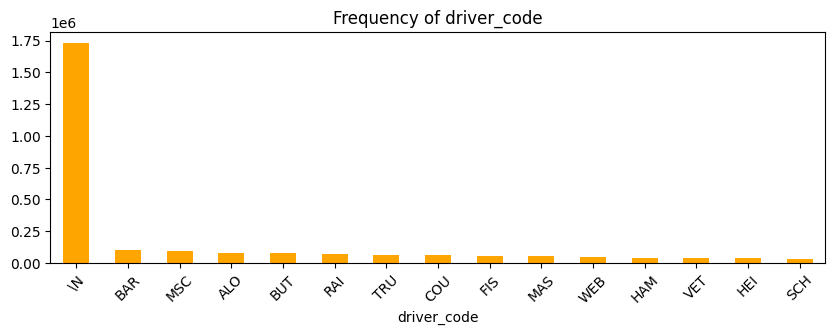


 forename 
Type: object
Unique values: 453


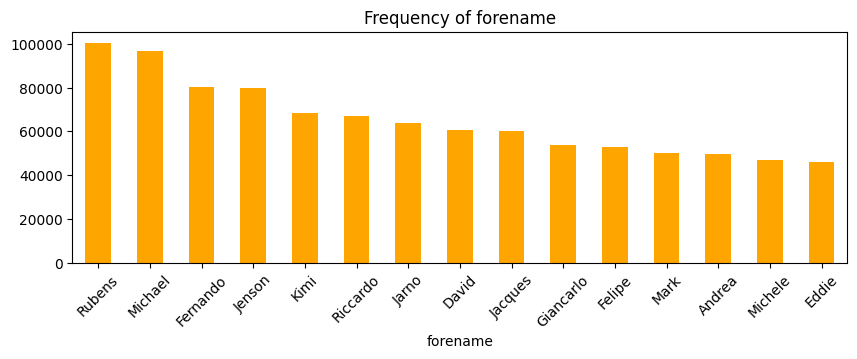


 surname 
Type: object
Unique values: 764


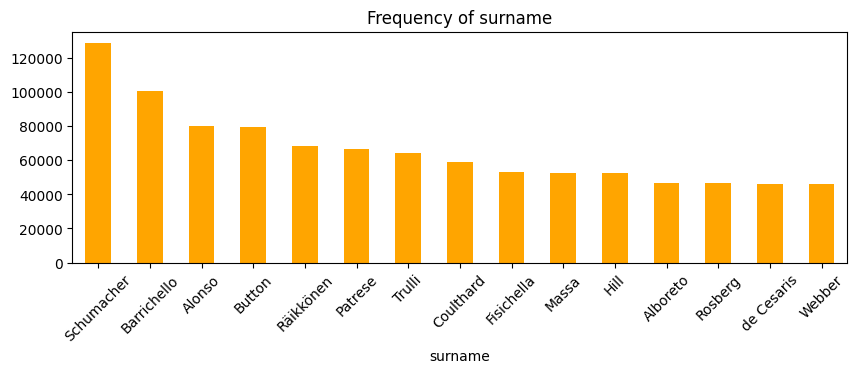


 nationality 
Type: object
Unique values: 40


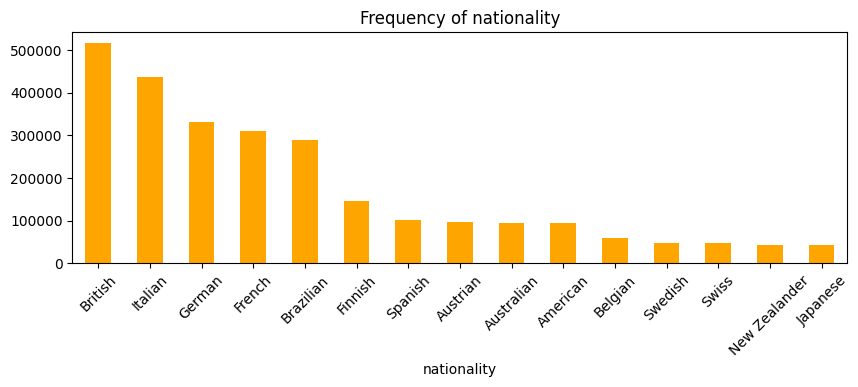


 points_y 
Type: float64
Min: 0.00
Max: 413.00
Mean: 20.00
Median: 6.00


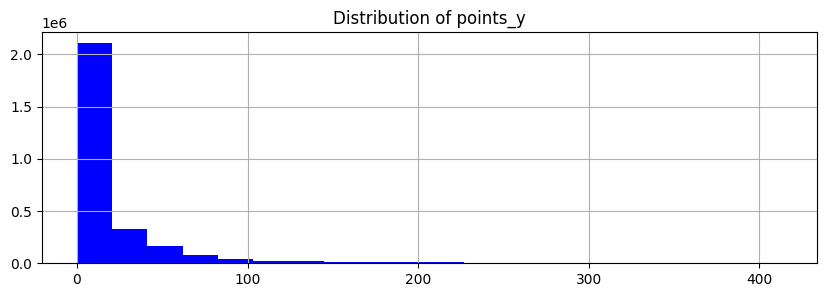


 wins 
Type: int64
Min: 0.00
Max: 13.00
Mean: 0.50
Median: 0.00


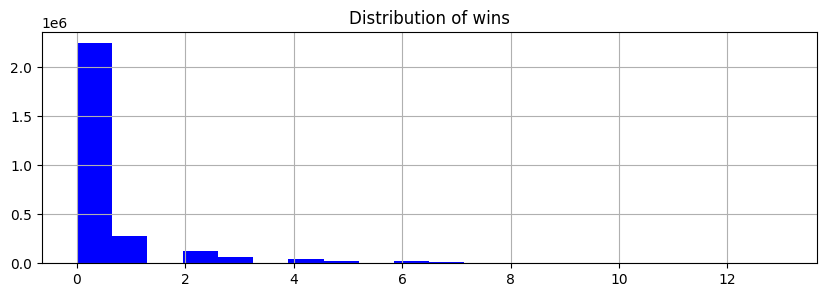


 company 
Type: object
Unique values: 205


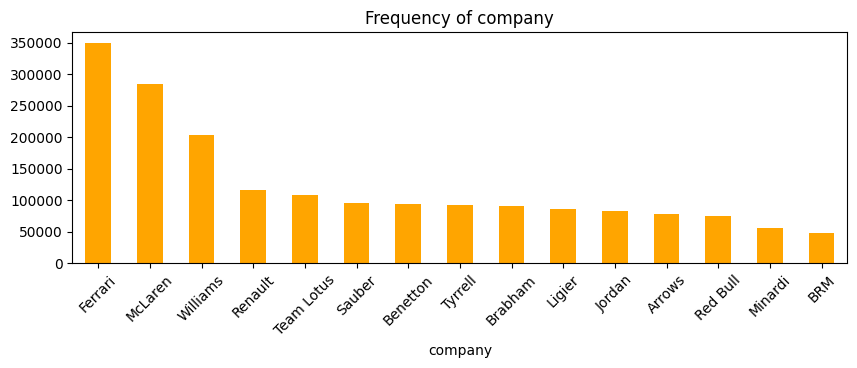


 nationality_y 
Type: object
Unique values: 24


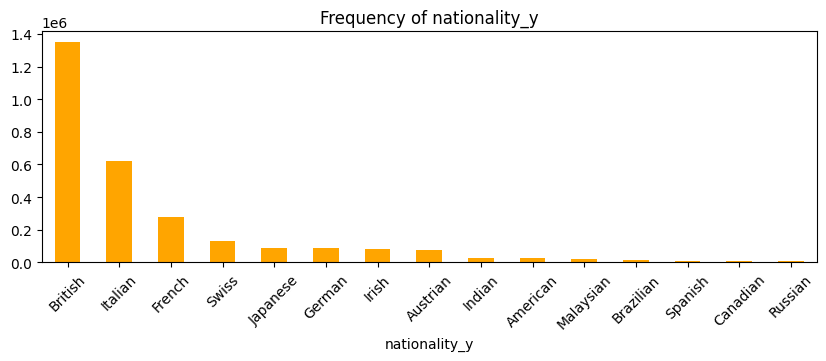


 status 
Type: object
Unique values: 128


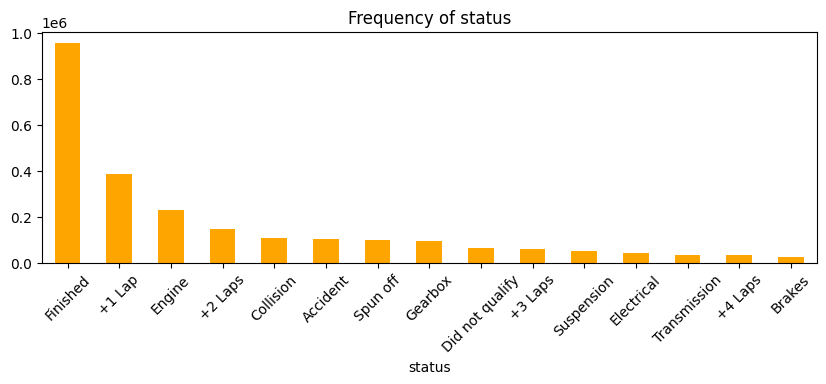


 driver_experience 
Type: float64
Min: 1.00
Max: 33.00
Mean: 9.09
Median: 8.00


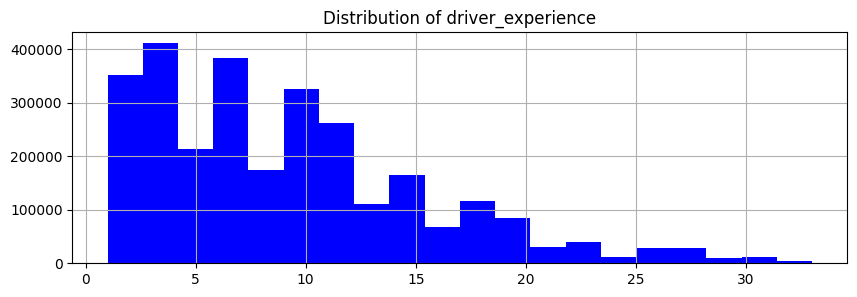


 team_experience 
Type: float64
Min: 1.00
Max: 64.00
Mean: 15.01
Median: 9.00


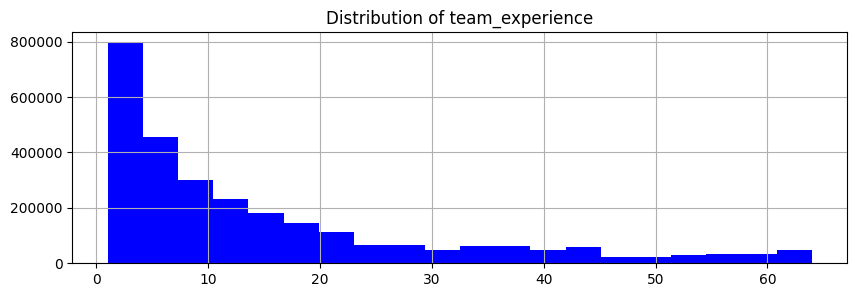


 qualifying_gap 
Type: int64
Min: -39.00
Max: 30.00
Mean: -1.73
Median: 0.00


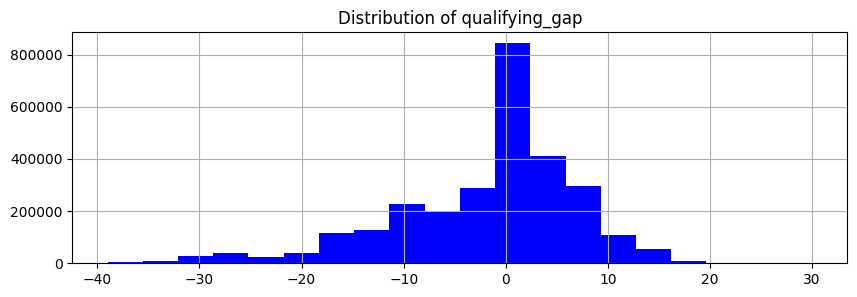


 track_familiarity 
Type: float64
Min: 1.00
Max: 23.00
Mean: 4.86
Median: 4.00


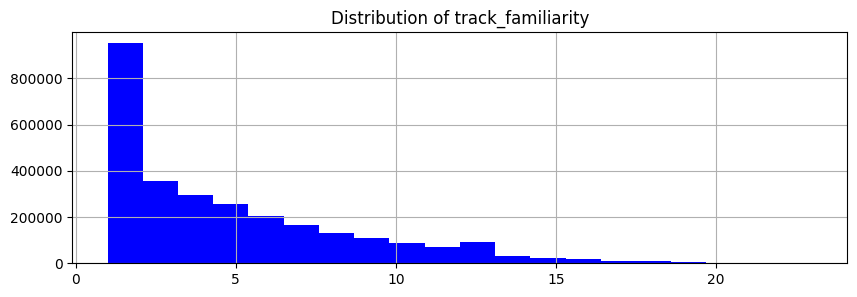


✔ Data preparation complete. X is ready for modeling!


In [ ]:
X = X.drop(cols_to_drop, axis=1, errors='ignore')

print(f"\nRemaining columns after cleaning ({len(X.columns)}):")
print(X.columns.tolist())

# Verify column removal
accidentally_kept = set(cols_to_drop) & set(X.columns)
if accidentally_kept:
    print("\nWarning: These columns were not dropped:")
    print(accidentally_kept)
else:
    print("\nAll specified columns were successfully removed.")


vis_data = X.copy()

# Handle missing values in the visualization data
for col in vis_data.columns:
    if vis_data[col].isna().sum() > 0:
        if pd.api.types.is_numeric_dtype(vis_data[col]):
            vis_data[col] = vis_data[col].fillna(vis_data[col].median())
        else:
            vis_data[col] = vis_data[col].fillna(vis_data[col].mode()[0])

print(f"\nAnalyzing {len(vis_data.columns)} remaining columns:")

for col in vis_data.columns:
    print(f"\n {col} ")
    print(f"Type: {vis_data[col].dtype}")

    # Numeric columns analysis
    if pd.api.types.is_numeric_dtype(vis_data[col]):
        print(f"Min: {vis_data[col].min():.2f}")
        print(f"Max: {vis_data[col].max():.2f}")
        print(f"Mean: {vis_data[col].mean():.2f}")
        print(f"Median: {vis_data[col].median():.2f}")

        plt.figure(figsize=(10, 3))
        vis_data[col].hist(bins=20, color='blue')
        plt.title(f"Distribution of {col}")
        plt.show()

    # Categorical columns analysis
    else:
        unique_count = vis_data[col].nunique()
        print(f"Unique values: {unique_count}")

        if unique_count <= 15:
            print("Sample values:", vis_data[col].unique())

        plt.figure(figsize=(10, 3))
        vis_data[col].value_counts().head(15).plot(kind='bar', color='orange')
        plt.title(f"Frequency of {col}")
        plt.xticks(rotation=45)
        plt.show()

print("\n✔ Data preparation complete. X is ready for modeling!")

In [ ]:
print("CLEANED DATASET COLUMNS (READY FOR MODELING)")

columns_info = pd.DataFrame({
    'Column Name': X.columns,
    'Data Type': X.dtypes.values,
    'Missing Values': X.isna().sum().values,
    'Sample Value': X.iloc[0].values
})

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 20)

print("\nCurrent working columns in X:")
print(columns_info)

print(f"TOTAL COLUMNS REMAINING: {len(X.columns)}")

CLEANED DATASET COLUMNS (READY FOR MODELING)

Current working columns in X:
          Column Name Data Type  Missing Values        Sample Value
0              number    object               0                   2
1                grid     int64               0                   1
2      positionText_x    object               0                   1
3       positionOrder     int64               0                   1
4              points   float64               0                 9.0
5                laps     int64               0                  70
6              time_x    object               0           2:13:23.6
7          fastestLap    object               0                  \N
8                rank    object               0                  \N
9      fastestLapTime    object               0                  \N
10          max_speed    object               0                  \N
11           statusId     int64               0                   1
12               year     int64         

<ipython-input-17-09951487a167>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='nationality', data=recent_races[recent_races['position'] == 1],


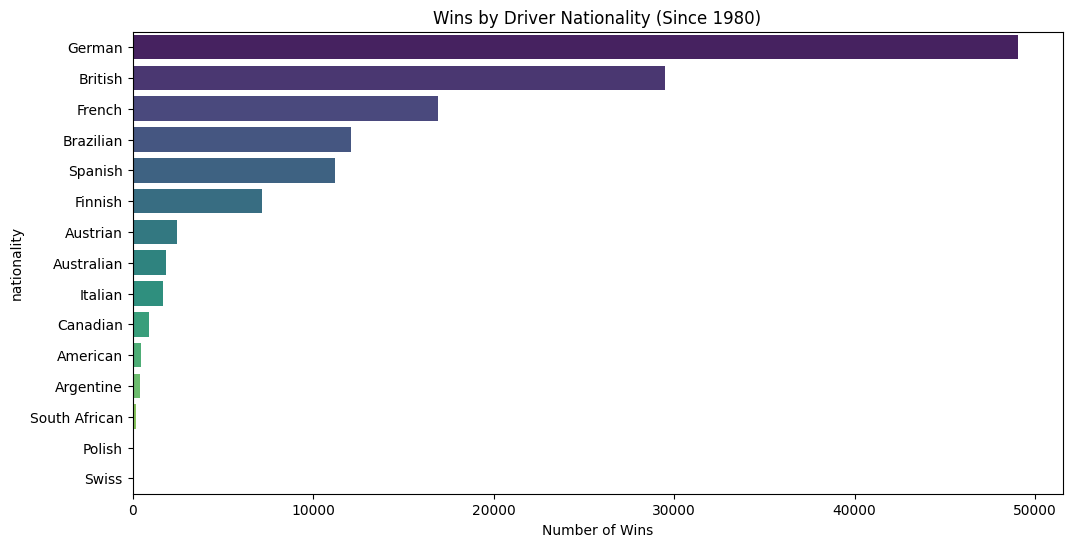

<ipython-input-17-09951487a167>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='company', data=recent_races[recent_races['position'] == 1],


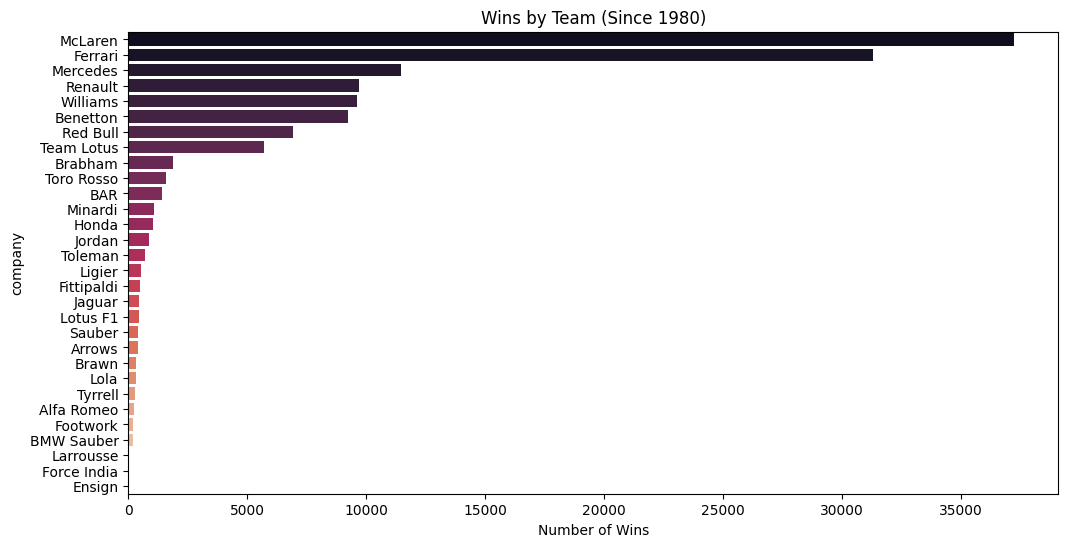

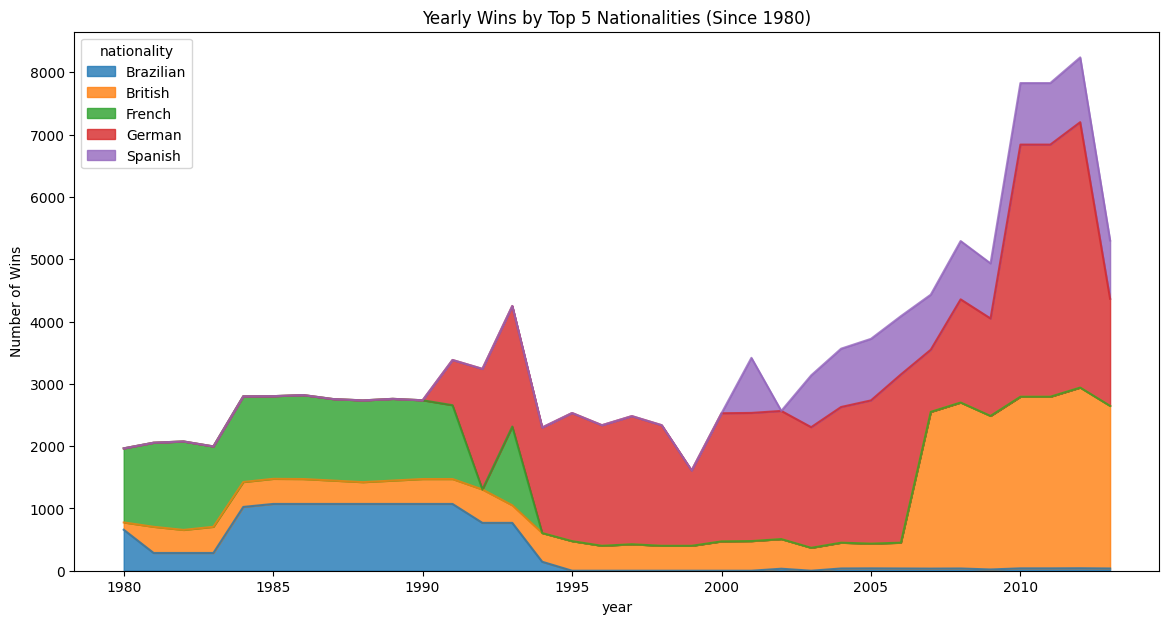

In [ ]:
# Filter data from 1980 onwards
recent_races = train_df[train_df['year'] >= 1980]

# Count wins by driver nationality
plt.figure(figsize=(12,6))
sns.countplot(y='nationality', data=recent_races[recent_races['position'] == 1],
             order=recent_races[recent_races['position'] == 1]['nationality'].value_counts().index,
             palette='viridis')
plt.title('Wins by Driver Nationality (Since 1980)')
plt.xlabel('Number of Wins')
plt.show()

# Count wins by team
plt.figure(figsize=(12,6))
sns.countplot(y='company', data=recent_races[recent_races['position'] == 1],
             order=recent_races[recent_races['position'] == 1]['company'].value_counts().index,
             palette='rocket')
plt.title('Wins by Team (Since 1980)')
plt.xlabel('Number of Wins')
plt.show()

# Count wins by year and nationality (top 5)
top_nations = recent_races[recent_races['position'] == 1]['nationality'].value_counts().head(5).index
yearly_wins = recent_races[recent_races['nationality'].isin(top_nations)]
yearly_wins = yearly_wins[yearly_wins['position'] == 1].groupby(['year','nationality']).size().unstack()

yearly_wins.plot(kind='area', figsize=(14,7), alpha=0.8)
plt.title('Yearly Wins by Top 5 Nationalities (Since 1980)')
plt.ylabel('Number of Wins')
plt.show()

In [ ]:
# Get unique fastest laps for each Grand Prix each year (1980+)
fastest_laps = (
    train_df[(train_df['rank'] == 1) & (train_df['year'] >= 1980)]
    .sort_values(['year', 'grand_prix', 'fastestLapTime'])
    .drop_duplicates(['year', 'grand_prix'])  # Ensure one per race
    [['grand_prix', 'year', 'forename', 'surname', 'company', 'fastestLapTime']]
    .sort_values(['year', 'grand_prix'])
    .reset_index(drop=True)
)

fastest_laps

grand_prix  year   forename     surname      company fastestLapTime
0   Abu Dhabi Grand ...  2011       Mark      Webber     Red Bull       1:42.612
1   Australian Grand...  2011     Felipe       Massa      Ferrari       1:28.947
2    Belgian Grand Prix  2011       Mark      Webber     Red Bull       1:49.883
3   Brazilian Grand ...  2011       Mark      Webber     Red Bull       1:15.324
4    British Grand Prix  2011   Fernando      Alonso      Ferrari       1:34.908
5   Canadian Grand Prix  2011     Jenson      Button      McLaren       1:16.956
6    Chinese Grand Prix  2011       Mark      Webber     Red Bull       1:38.993
7   European Grand Prix  2011  Sebastian      Vettel     Red Bull       1:41.852
8     German Grand Prix  2011      Lewis    Hamilton      McLaren       1:34.302
9   Hungarian Grand ...  2011     Felipe       Massa      Ferrari       1:23.415
10    Indian Grand Prix  2011  Sebastian      Vettel     Red Bull       1:27.249
11   Italian Grand Prix  2011      Lewis    Hamilton      McLaren       1:26.187
12  Japanese Grand Prix  2011     Jenson      Button      McLaren       1:36.568
13    Korean Grand Prix  2011  Sebastian      Vettel     Red Bull       1:39.605
14  Malaysian Grand ...  2011       Mark      Webber     Red Bull       1:40.571
15    Monaco Grand Prix  2011       Mark      Webber     Red Bull       1:16.234
16  Singapore Grand ...  2011     Jenson      Button      McLaren       1:48.454
17   Spanish Grand Prix  2011      Lewis    Hamilton      McLaren       1:26.727
18   Turkish Grand Prix  2011       Mark      Webber     Red Bull       1:29.703
19  Abu Dhabi Grand ...  2012  Sebastian      Vettel     Red Bull       1:43.964
20  Australian Grand...  2012     Jenson      Button      McLaren       1:29.187
21   Bahrain Grand Prix  2012  Sebastian      Vettel     Red Bull       1:36.379
22   Belgian Grand Prix  2012      Bruno       Senna     Williams       1:52.822
23  Brazilian Grand ...  2012      Lewis    Hamilton      McLaren       1:18.069
24   British Grand Prix  2012       Kimi   Räikkönen     Lotus F1       1:34.661
25  Canadian Grand Prix  2012  Sebastian      Vettel     Red Bull       1:15.752
26   Chinese Grand Prix  2012      Kamui   Kobayashi       Sauber       1:39.960
27  European Grand Prix  2012       Nico     Rosberg     Mercedes       1:42.163
28    German Grand Prix  2012    Michael  Schumacher     Mercedes       1:18.725
29  Hungarian Grand ...  2012  Sebastian      Vettel     Red Bull       1:24.136
30    Indian Grand Prix  2012     Jenson      Button      McLaren       1:28.203
31   Italian Grand Prix  2012       Nico     Rosberg     Mercedes       1:27.239
32  Japanese Grand Prix  2012  Sebastian      Vettel     Red Bull       1:35.774
33    Korean Grand Prix  2012       Mark      Webber     Red Bull       1:42.037
34  Malaysian Grand ...  2012       Kimi   Räikkönen     Lotus F1       1:40.722
35    Monaco Grand Prix  2012     Sergio       Pérez       Sauber       1:17.296
36  Singapore Grand ...  2012       Nico  Hülkenberg  Force India       1:51.033
37   Spanish Grand Prix  2012     Romain    Grosjean     Lotus F1       1:26.250
38  United States Gr...  2012  Sebastian      Vettel     Red Bull       1:39.347
39  Abu Dhabi Grand ...  2013   Fernando      Alonso      Ferrari       1:43.434
40  Australian Grand...  2013       Kimi   Räikkönen     Lotus F1       1:29.274
41   Bahrain Grand Prix  2013  Sebastian      Vettel     Red Bull       1:36.961
42   Belgian Grand Prix  2013  Sebastian      Vettel     Red Bull       1:50.756
43  Brazilian Grand ...  2013       Mark      Webber     Red Bull       1:15.436
44   British Grand Prix  2013       Mark      Webber     Red Bull       1:33.401
45  Canadian Grand Prix  2013       Mark      Webber     Red Bull       1:16.182
46   Chinese Grand Prix  2013  Sebastian      Vettel     Red Bull       1:36.808
47    German Grand Prix  2013   Fernando      Alonso      Ferrari       1:33.468
48  Hungarian Grand ...  2013       Mark    

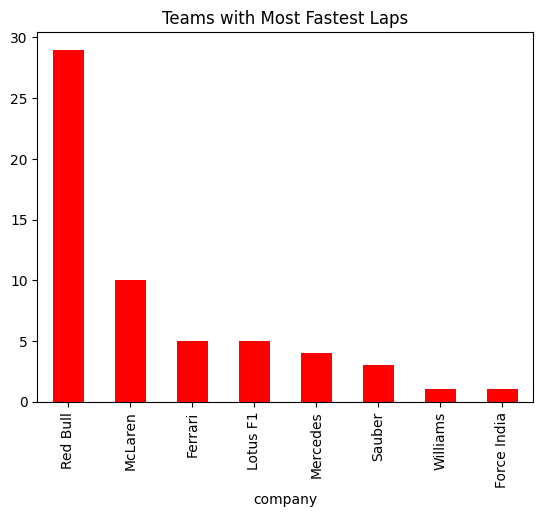

In [ ]:
fastest_laps['company'].value_counts().head(10).plot(kind='bar', color='red')
plt.title('Teams with Most Fastest Laps')
plt.show()

Most Successful Drivers Each Year:
    year forename     surname nationality   company  wins
0   2013    Lewis    Hamilton     British  Mercedes  2250
1   2012    Lewis    Hamilton     British   McLaren  2500
2   2011    Lewis    Hamilton     British   McLaren  2375
3   2010    Lewis    Hamilton     British   McLaren  2375
4   2009    Lewis    Hamilton     British   McLaren  2125
5   2008    Lewis    Hamilton     British   McLaren  2250
6   2007    Lewis    Hamilton     British   McLaren  2125
7   2006  Michael  Schumacher      German   Ferrari  2178
8   2005  Michael  Schumacher      German   Ferrari  2299
9   2004  Michael  Schumacher      German   Ferrari  2178
10  2003  Michael  Schumacher      German   Ferrari  1936
11  2002  Michael  Schumacher      German   Ferrari  2057
12  2001  Michael  Schumacher      German   Ferrari  2057
13  2000  Michael  Schumacher      German   Ferrari  2057
14  1999  Michael  Schumacher      German   Ferrari  1210
15  1998  Michael  Schumacher      Ge

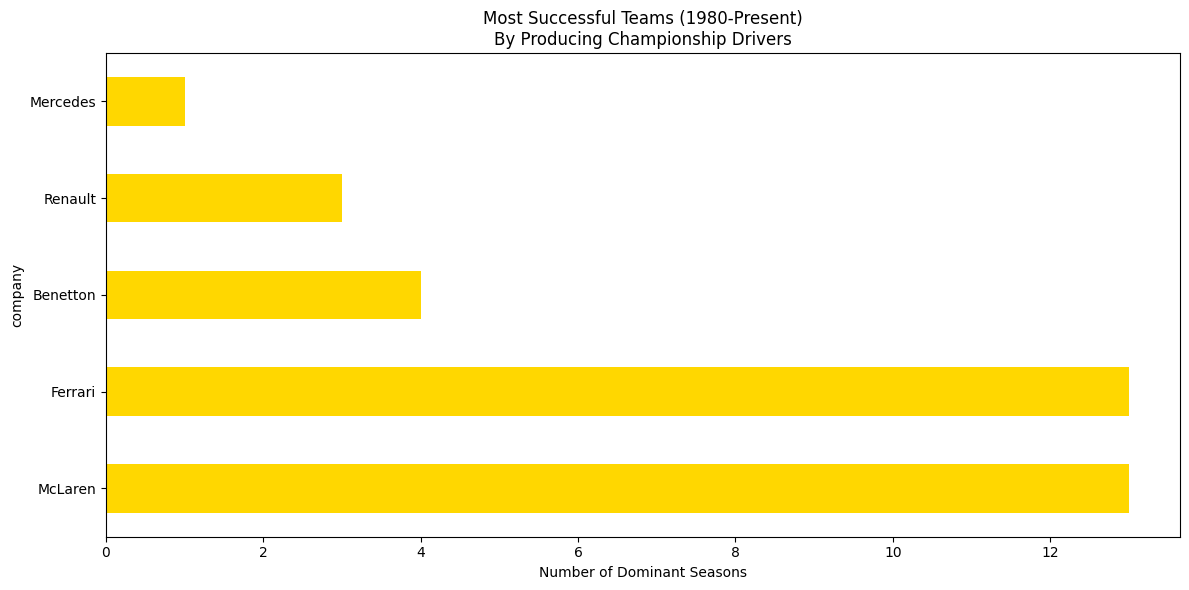

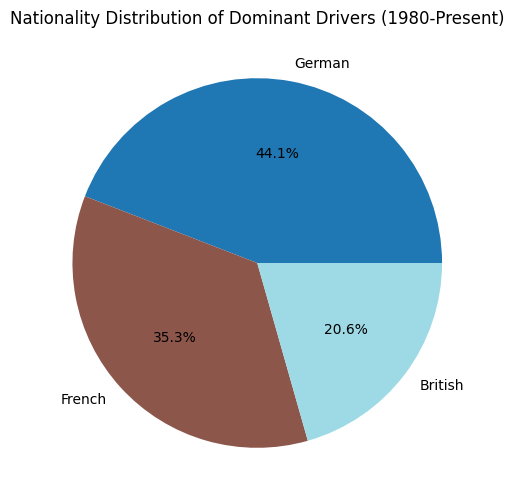

In [ ]:
# 1. Filter data from 1980 onwards
modern_era = train_df[train_df['year'] >= 1980]

# 2. Find yearly top drivers (wins, nationality, team)
yearly_top = modern_era[modern_era['position'] == 1].groupby(
    ['year', 'forename', 'surname', 'nationality', 'company']
).size().reset_index(name='wins')

yearly_champions = yearly_top.loc[yearly_top.groupby('year')['wins'].idxmax()]

# 3. Display results
print("Most Successful Drivers Each Year:")
print(yearly_champions[['year', 'forename', 'surname', 'nationality', 'company', 'wins']]
      .sort_values('year', ascending=False)
      .reset_index(drop=True))

# 4. Visualization - Top Teams
plt.figure(figsize=(12,6))
team_wins = yearly_champions['company'].value_counts()
team_wins.plot(kind='barh', color='gold')
plt.title('Most Successful Teams (1980-Present)\nBy Producing Championship Drivers')
plt.xlabel('Number of Dominant Seasons')
plt.tight_layout()
plt.show()

# 5. Visualization - National Dominance
plt.figure(figsize=(12,6))
national_wins = yearly_champions['nationality'].value_counts()
national_wins.plot(kind='pie', autopct='%1.1f%%', colormap='tab20')
plt.title('Nationality Distribution of Dominant Drivers (1980-Present)')
plt.ylabel('')
plt.show()

<ipython-input-21-5f57dd4390e8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modern_era['clean_lap_time'] = modern_era['fastestLapTime'].apply(clean_lap_time)


Maximum Lap Times by Driver in 2022:
Empty DataFrame
Columns: [year, grand_prix, forename, surname, company, clean_lap_time, lap_time_seconds]
Index: []


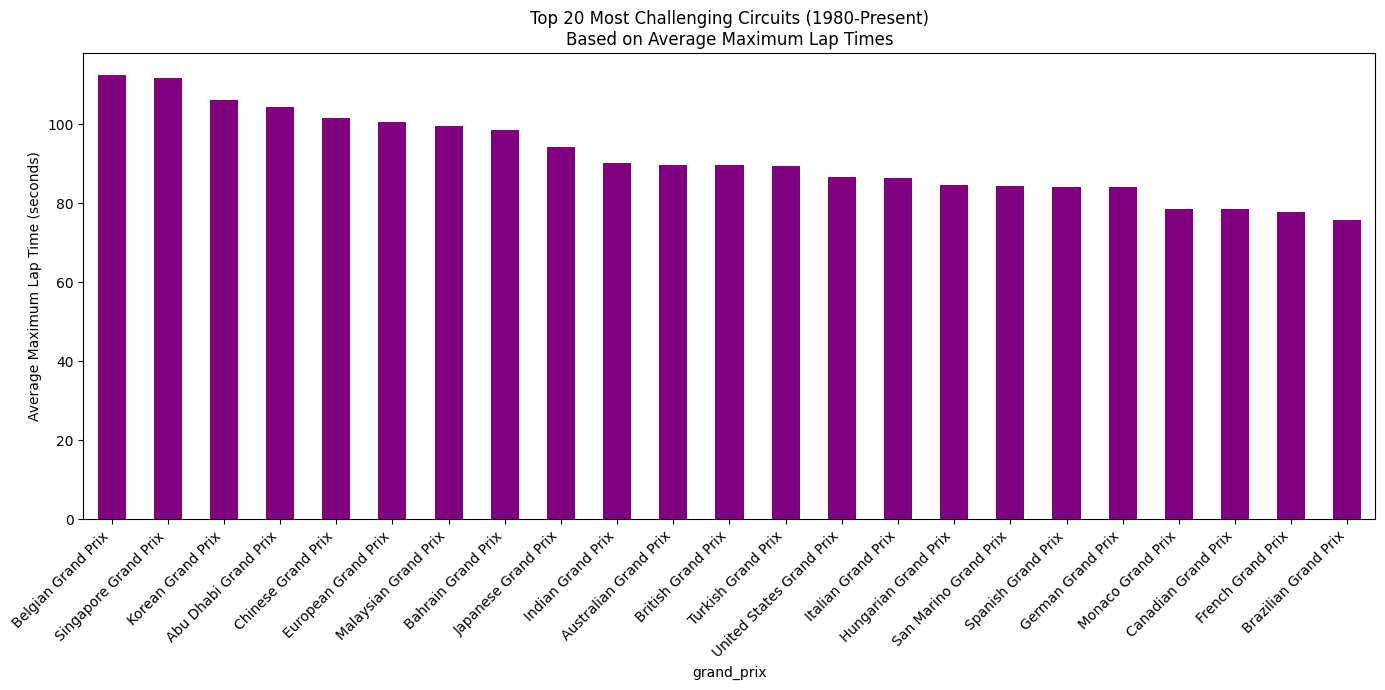


Slowest Recorded Lap in Modern Era:
Year: 2007
Grand Prix: European Grand Prix
Driver: Vitantonio Liuzzi
Team: Toro Rosso
Lap Time: 00:03:22.30


In [ ]:

modern_era = train_df[(train_df['year'] >= 1980) &
                     (train_df['fastestLapTime'].notna()) &
                     (train_df['fastestLapTime'] != '\\N')]

def clean_lap_time(time_str):
    try:
        if pd.isna(time_str) or time_str == '\\N':
            return pd.NaT
        if len(time_str.split(':')) == 1:
            return pd.to_timedelta(f"00:00:{time_str}")
        else:
            return pd.to_timedelta(f"00:{time_str}")
    except:
        return pd.NaT

modern_era['clean_lap_time'] = modern_era['fastestLapTime'].apply(clean_lap_time)

max_lap_times = (
    modern_era.groupby(['year', 'grand_prix', 'forename', 'surname', 'company'])
    ['clean_lap_time'].max()
    .reset_index()
    .sort_values(['year', 'grand_prix', 'clean_lap_time'], ascending=[True, True, False])
    .dropna()
)

max_lap_times['lap_time_seconds'] = max_lap_times['clean_lap_time'].dt.total_seconds()

print("Maximum Lap Times by Driver in 2022:")
print(max_lap_times[max_lap_times['year'] == 2022]
      .sort_values('grand_prix')
      .reset_index(drop=True))

plt.figure(figsize=(14, 7))
(
    max_lap_times.groupby('grand_prix')['lap_time_seconds']
    .mean()
    .sort_values(ascending=False)
    .head(100)
    .plot(kind='bar', color='purple')
)
plt.title('Top 20 Most Challenging Circuits (1980-Present)\nBased on Average Maximum Lap Times')
plt.ylabel('Average Maximum Lap Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

slowest_lap = max_lap_times.loc[max_lap_times['lap_time_seconds'].idxmax()]
print("\nSlowest Recorded Lap in Modern Era:")
print(f"Year: {slowest_lap['year']}")
print(f"Grand Prix: {slowest_lap['grand_prix']}")
print(f"Driver: {slowest_lap['forename']} {slowest_lap['surname']}")
print(f"Team: {slowest_lap['company']}")
print(f"Lap Time: {str(slowest_lap['clean_lap_time'])[-15:-4]}")

Drivers with Highest Average Lap Times (Worst Performances):
      forename      surname  lap_time_seconds
0        Scott        Speed        137.995500
1       Pastor    Maldonado        134.040667
2        Lucas    di Grassi        129.361000
3       Franck     Montagny        127.709000
4    Alexander         Wurz        125.636000
5   Vitantonio       Liuzzi        125.498500
6        Bruno        Senna        122.202667
7   Christijan       Albers        121.627000
8       Robert     Doornbos        121.148000
9        Jaime  Alguersuari        119.964000
10      Jérôme   d'Ambrosio        118.730000
11      Narain  Karthikeyan        118.507000
12       Sakon     Yamamoto        118.313000
13       Tiago     Monteiro        117.886000
14   Christian        Klien        117.766000
15       Pedro   de la Rosa        117.671000
16     Charles          Pic        117.634500
17      Daniel    Ricciardo        115.461000
18         Max      Chilton        114.924000
19       Jules     

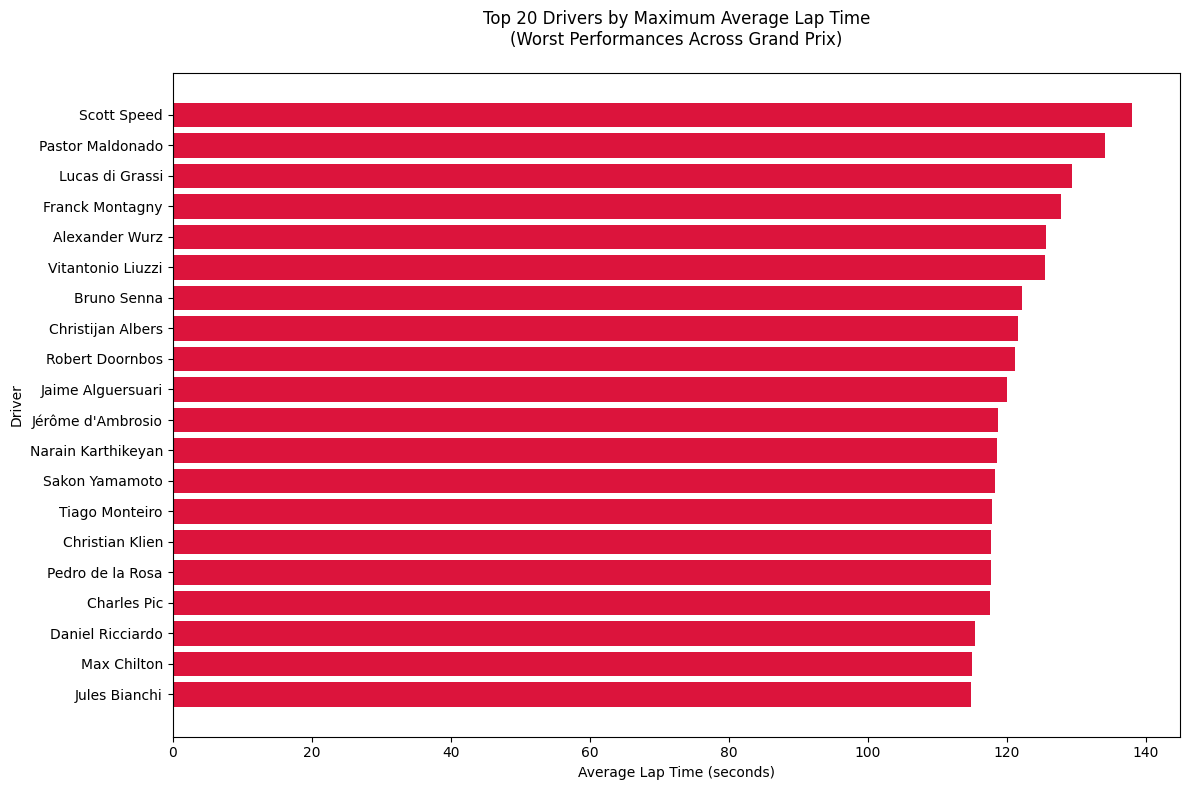

In [ ]:

modern_era = train_df[
    (train_df['year'] >= 1980) &
    (train_df['fastestLapTime'].notna()) &
    (train_df['fastestLapTime'] != '\\N')
].copy()

# Convert lap times to seconds
def convert_lap_time(time_str):
    try:
        parts = time_str.split(':')
        if len(parts) == 2:  # mm:ss.xxx format
            return int(parts[0])*60 + float(parts[1])
        else:  # ss.xxx format
            return float(parts[0])
    except:
        return None

modern_era['lap_time_seconds'] = modern_era['fastestLapTime'].apply(convert_lap_time)
modern_era = modern_era.dropna(subset=['lap_time_seconds'])

# 2. Calculate average lap time per driver per Grand Prix
driver_gp_avg = modern_era.groupby(
    ['forename', 'surname', 'grand_prix']
)['lap_time_seconds'].mean().reset_index()

# 3. Find maximum average lap time for each driver (their worst performance)
driver_max_avg = driver_gp_avg.groupby(
    ['forename', 'surname']
)['lap_time_seconds'].max().reset_index()

# Sort by worst average lap time (descending)
driver_max_avg = driver_max_avg.sort_values('lap_time_seconds', ascending=False)

# 4. Display results
print("Drivers with Highest Average Lap Times (Worst Performances):")
print(driver_max_avg.head(20).reset_index(drop=True))

# 5. Visualization
plt.figure(figsize=(12, 8))
top_drivers = driver_max_avg.head(20)
plt.barh(
    top_drivers['forename'] + ' ' + top_drivers['surname'],
    top_drivers['lap_time_seconds'],
    color='crimson'
)
plt.title('Top 20 Drivers by Maximum Average Lap Time\n(Worst Performances Across Grand Prix)', pad=20)
plt.xlabel('Average Lap Time (seconds)')
plt.ylabel('Driver')
plt.gca().invert_yaxis()  # Show worst at top
plt.tight_layout()
plt.show()

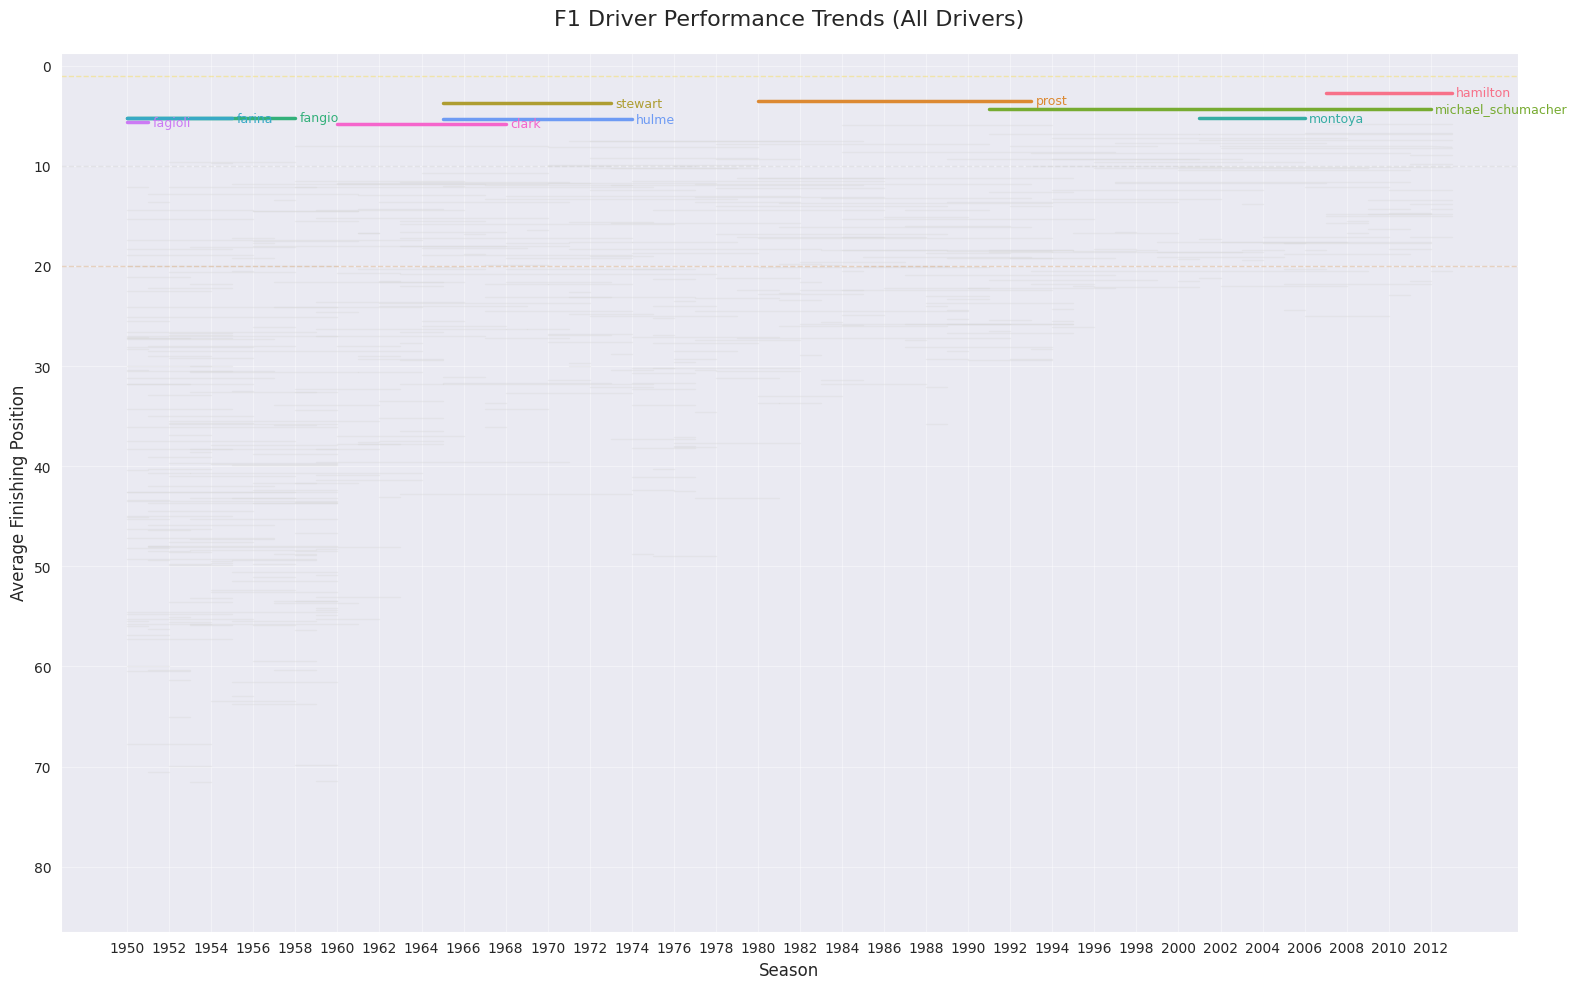

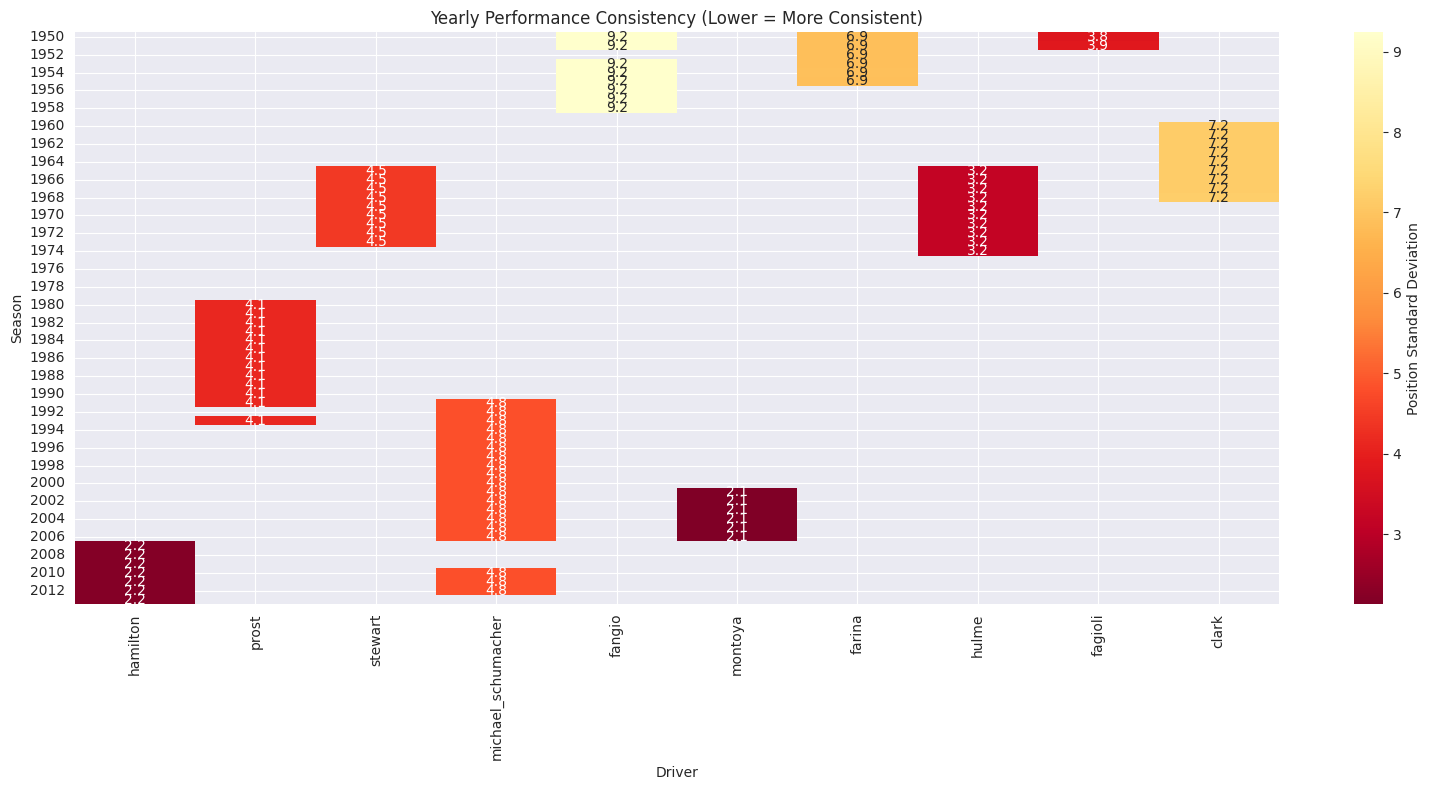

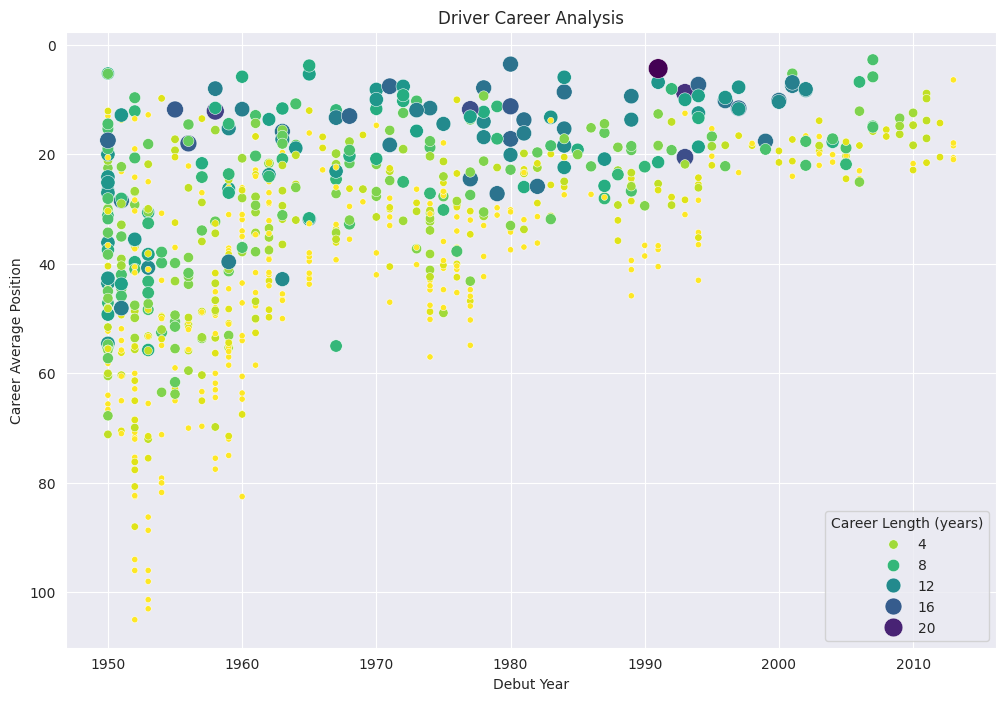

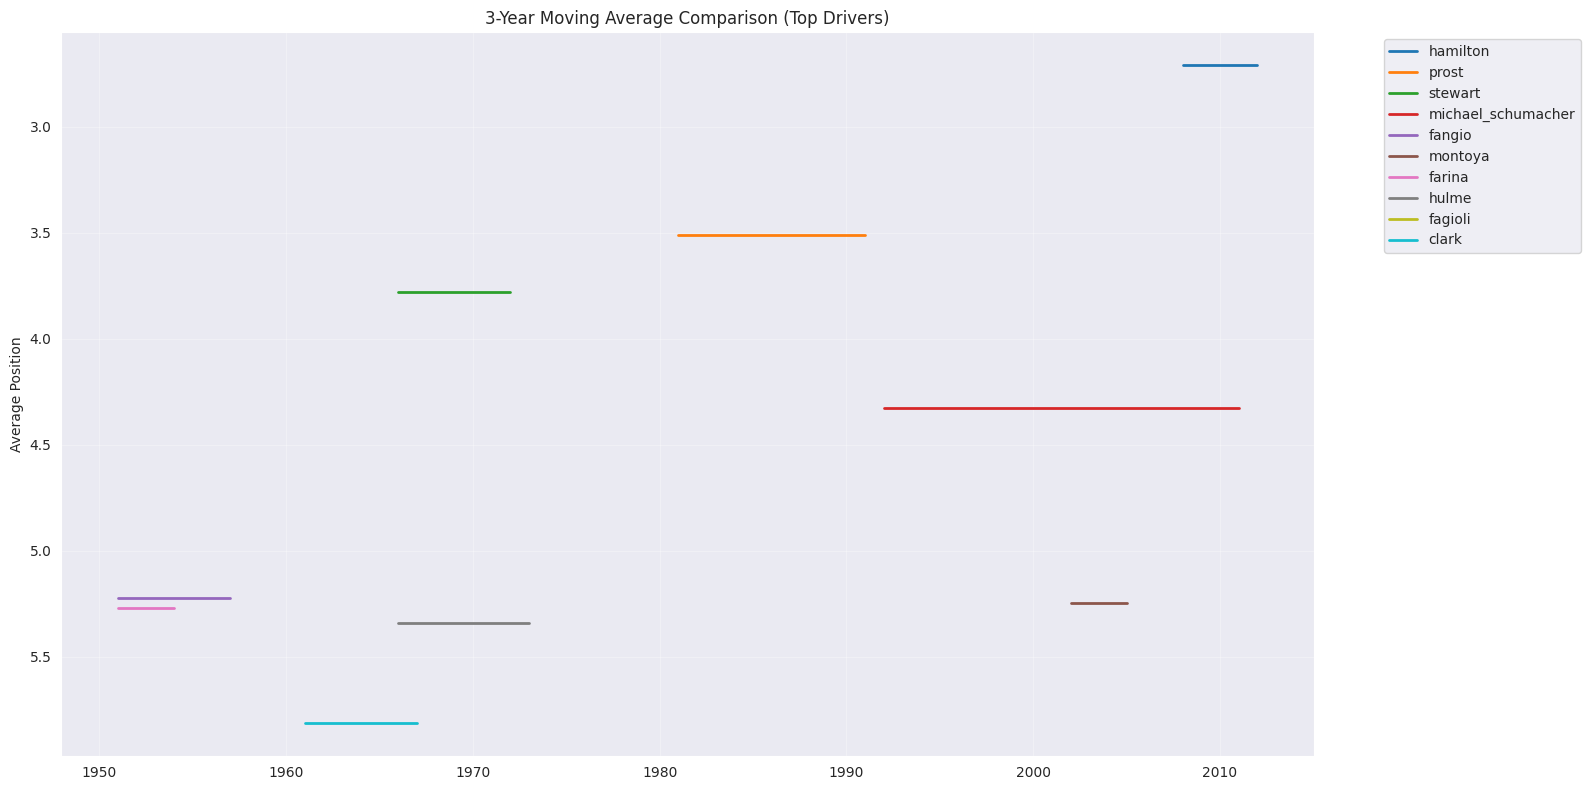

In [ ]:
# COMPREHENSIVE DRIVER PERFORMANCE TREND ANALYSIS

# Set the style correctly (using seaborn's built-in styles)
sns.set_style("darkgrid")

# 1. Prepare the data
driver_yearly = train_df.groupby(['driverRef', 'year'])['position'].agg(['mean', 'count'])
driver_yearly = driver_yearly[driver_yearly['count'] >= 10]  # Only drivers with ≥10 races/year
driver_yearly.reset_index(inplace=True)

# 2. Create a ranking system (percentile)
driver_yearly['percentile'] = driver_yearly.groupby('year')['mean'].rank(pct=True)

# 3. Plotting parameters
palette = sns.color_palette("husl", 10)  # For highlighting top drivers

# 4. Time Series Analysis - All Drivers
plt.figure(figsize=(16, 10))

# Get top 10 drivers by career average
top_drivers = (train_df.groupby('driverRef')['position']
               .mean()
               .sort_values()
               .head(10)
               .index.tolist())

# Plot all drivers (light gray)
for driver in driver_yearly['driverRef'].unique():
    driver_data = driver_yearly[driver_yearly['driverRef'] == driver]
    plt.plot(driver_data['year'],
             driver_data['mean'],
             color='lightgray',
             alpha=0.3,
             linewidth=1)

# Highlight top drivers with colors
for i, driver in enumerate(top_drivers):
    driver_data = driver_yearly[driver_yearly['driverRef'] == driver]
    plt.plot(driver_data['year'],
             driver_data['mean'],
             color=palette[i],
             linewidth=2.5,
             label=driver)

    # Add driver labels at last position
    last_year = driver_data['year'].max()
    last_pos = driver_data[driver_data['year']==last_year]['mean'].values[0]
    plt.text(last_year+0.2,
             last_pos,
             driver,
             fontsize=9,
             color=palette[i],
             va='center')

# Formatting
plt.title('F1 Driver Performance Trends (All Drivers)', fontsize=16, pad=20)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Finishing Position', fontsize=12)
plt.gca().invert_yaxis()
plt.xticks(range(min(driver_yearly['year']), max(driver_yearly['year'])+1, 2))
plt.grid(True, alpha=0.4)
plt.tight_layout()

# Add reference lines
plt.axhline(1, color='gold', linestyle='--', alpha=0.3, linewidth=1)
plt.axhline(10, color='silver', linestyle='--', alpha=0.3, linewidth=1)
plt.axhline(20, color='peru', linestyle='--', alpha=0.3, linewidth=1)

plt.show()


# SUPPLEMENTARY ANALYSES
# A. Performance Consistency Analysis
plt.figure(figsize=(16, 8))
consistency = train_df.groupby(['driverRef', 'year'])['position'].std().unstack()
sns.heatmap(consistency.loc[top_drivers].T,
            cmap='YlOrRd_r',
            annot=True,
            fmt=".1f",
            cbar_kws={'label': 'Position Standard Deviation'})
plt.title('Yearly Performance Consistency (Lower = More Consistent)')
plt.ylabel('Season')
plt.xlabel('Driver')
plt.tight_layout()
plt.show()

# B. Career Progression Analysis
career_phases = train_df.groupby('driverRef').agg(
    career_start=('year', 'min'),
    career_end=('year', 'max'),
    avg_position=('position', 'mean')
)
career_phases['career_length'] = career_phases['career_end'] - career_phases['career_start'] + 1

plt.figure(figsize=(12, 8))
sns.scatterplot(data=career_phases,
                x='career_start',
                y='avg_position',
                size='career_length',
                hue='career_length',
                sizes=(20, 200),
                palette='viridis_r')
plt.gca().invert_yaxis()
plt.title('Driver Career Analysis')
plt.xlabel('Debut Year')
plt.ylabel('Career Average Position')
plt.legend(title='Career Length (years)')
plt.show()

# C. Moving Average Comparison
plt.figure(figsize=(16, 8))
for driver in top_drivers:
    driver_data = driver_yearly[driver_yearly['driverRef'] == driver]
    plt.plot(driver_data['year'],
             driver_data['mean'].rolling(3, center=True).mean(),
             label=driver,
             linewidth=2)

plt.title('3-Year Moving Average Comparison (Top Drivers)')
plt.ylabel('Average Position')
plt.gca().invert_yaxis()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

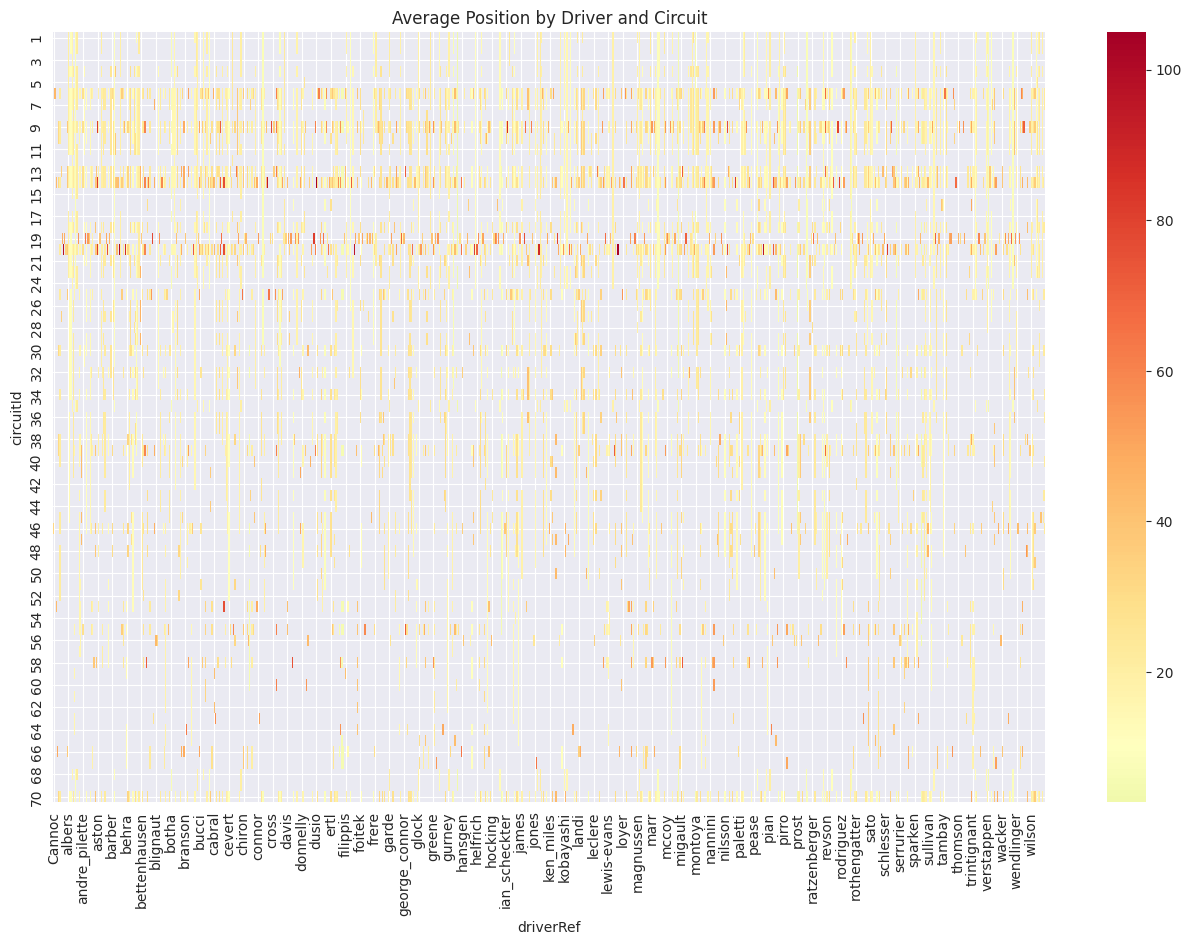

In [ ]:
# Heatmap of driver performance by circuit
circuit_performance = train_df.groupby(['circuitId','driverRef'])['position'].mean().unstack()
plt.figure(figsize=(16,10))
sns.heatmap(circuit_performance, cmap='RdYlGn_r', center=10)
plt.title('Average Position by Driver and Circuit')
plt.show()

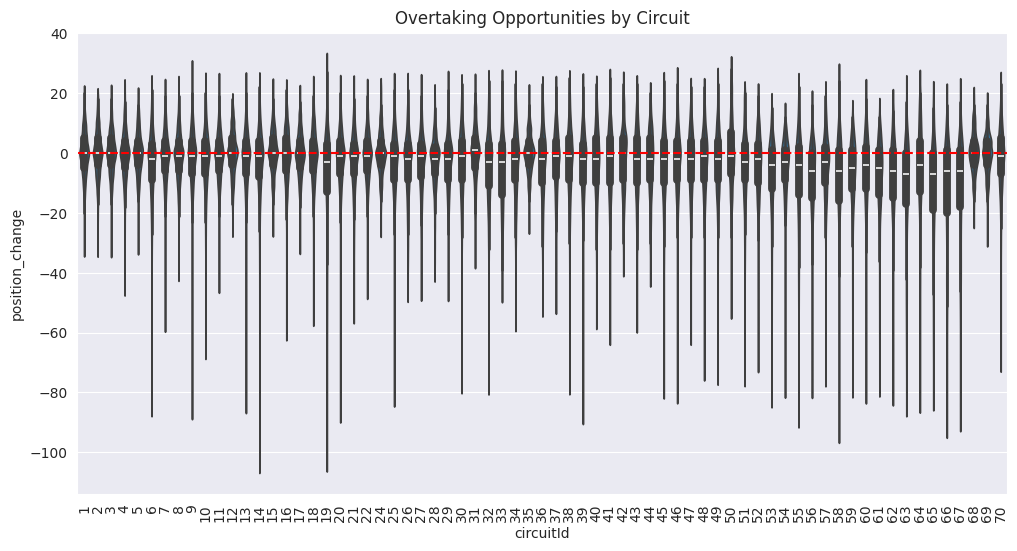

In [ ]:
train_df['position_change'] = train_df['grid'] - train_df['position']
plt.figure(figsize=(12,6))
sns.violinplot(x='circuitId', y='position_change', data=train_df)
plt.axhline(0, color='red', linestyle='--')
plt.title('Overtaking Opportunities by Circuit')
plt.xticks(rotation=90)
plt.show()

In [ ]:
import plotly.graph_objects as go

# Prepare grid vs position data
flow_data = train_df.groupby(['grid','position']).size().reset_index()
fig = go.Figure(go.Sankey(
    node=dict(label=[str(i) for i in range(1,21)]),
    link=dict(
        source=flow_data['grid']-1,
        target=flow_data['position']-1,
        value=flow_data[0]
    )))
fig.update_layout(title_text="Position Flow from Grid to Finish")
fig.show()

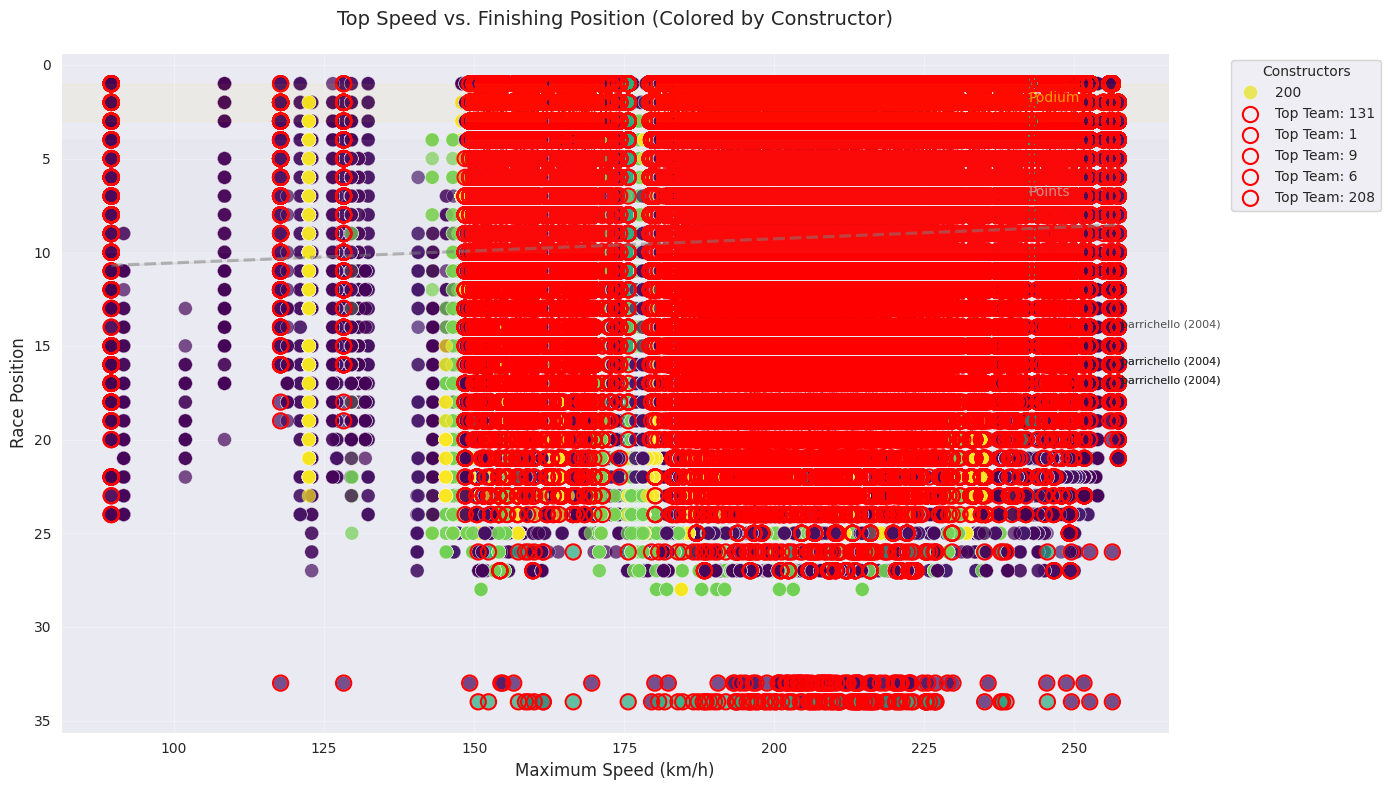

<ipython-input-27-ba3115670ae8>:84: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




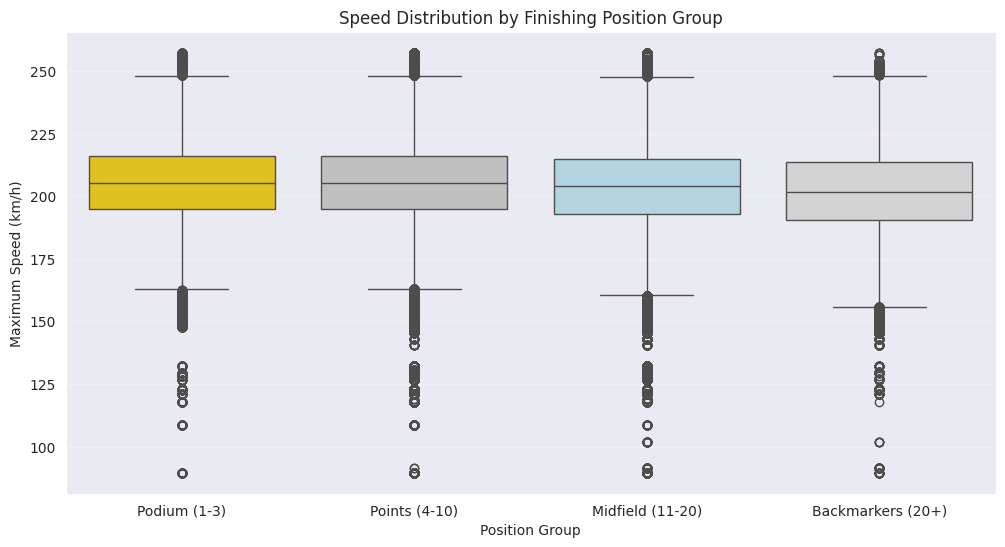

<ipython-input-27-ba3115670ae8>:95: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




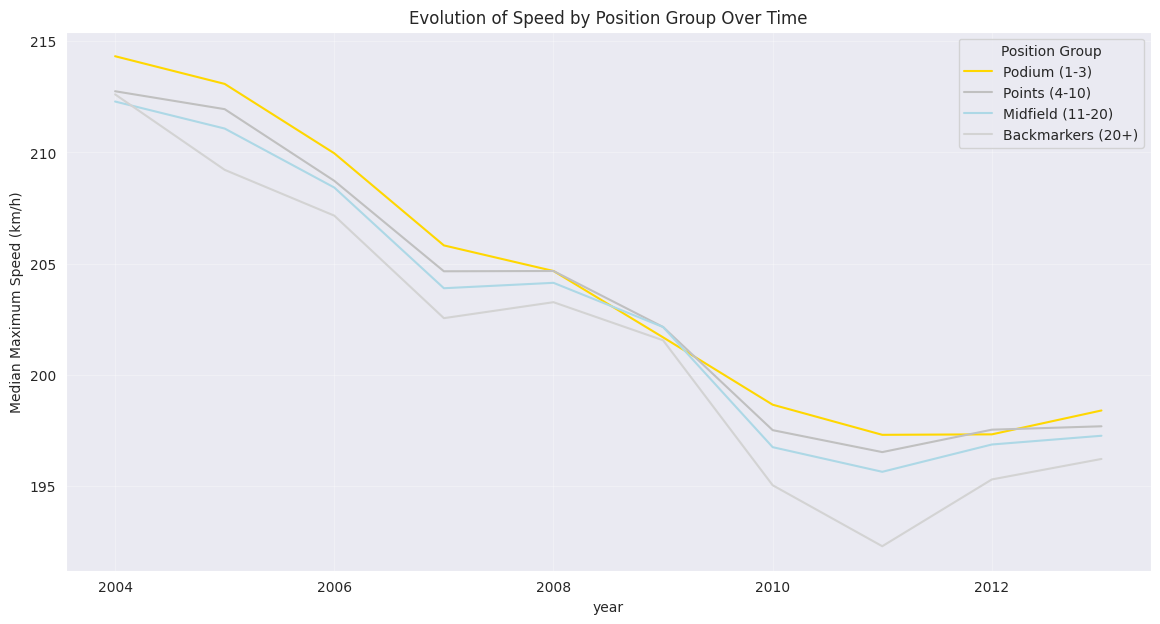

In [ ]:


# Convert relevant columns to numeric, coercing errors to NaN
train_df['max_speed'] = pd.to_numeric(train_df['max_speed'], errors='coerce')
train_df['position'] = pd.to_numeric(train_df['position'], errors='coerce')

# Remove rows with missing speed or position data
speed_analysis_df = train_df.dropna(subset=['max_speed', 'position']).copy()

# ==============================================
# ENHANCED SPEED vs POSITION ANALYSIS
# ==============================================

plt.figure(figsize=(14, 8))

# 1. Main Scatter Plot with Regression
ax = sns.regplot(x='max_speed', y='position',
                 data=speed_analysis_df,
                 scatter=False,
                 color='gray',
                 line_kws={'linestyle':'--', 'alpha':0.5})

# 2. Colored by constructor with improved styling
scatter = sns.scatterplot(x='max_speed', y='position',
                          hue='constructorId',
                          data=speed_analysis_df,
                          palette='viridis',
                          alpha=0.7,
                          s=100,
                          edgecolor='white',
                          linewidth=0.3)

# 3. Highlight top teams (using cleaned data)
top_teams = speed_analysis_df.groupby('constructorId')['position'].mean().nsmallest(5).index
for team in top_teams:
    team_data = speed_analysis_df[speed_analysis_df['constructorId'] == team]
    plt.scatter(team_data['max_speed'], team_data['position'],
                edgecolors='red',
                linewidths=1.5,
                s=120,
                facecolors='none',
                label=f'Top Team: {team}')

# 4. Add annotations for fastest cars
fastest = speed_analysis_df.nlargest(5, 'max_speed')
for i, row in fastest.iterrows():
    plt.annotate(f"{row['driverRef']} ({int(row['year'])})",
                 (row['max_speed']+0.5, row['position']),
                 fontsize=8,
                 alpha=0.8)

# 5. Formatting
plt.title('Top Speed vs. Finishing Position (Colored by Constructor)', pad=20, fontsize=14)
plt.xlabel('Maximum Speed (km/h)', fontsize=12)
plt.ylabel('Race Position', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)

# 6. Add reference zones
plt.axhspan(1, 3, color='gold', alpha=0.05)
plt.axhspan(4, 10, color='silver', alpha=0.05)
plt.text(speed_analysis_df['max_speed'].max()-15, 2, 'Podium', color='gold', alpha=0.7)
plt.text(speed_analysis_df['max_speed'].max()-15, 7, 'Points', color='silver', alpha=0.7)

# 7. Improve legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles[-6:], labels=labels[-6:],
           title='Constructors',
           bbox_to_anchor=(1.05, 1),
           loc='upper left')

plt.tight_layout()
plt.show()

# ==============================================
# SUPPLEMENTARY SPEED ANALYSIS (WITH CLEANED DATA)
# ==============================================

# Create position groups (after cleaning)
speed_analysis_df['position_group'] = pd.cut(speed_analysis_df['position'],
                                    bins=[0, 3, 10, 20, 100],
                                    labels=['Podium (1-3)', 'Points (4-10)', 'Midfield (11-20)', 'Backmarkers (20+)'])

# A. Speed Distribution by Position Group
plt.figure(figsize=(12, 6))
sns.boxplot(x='position_group', y='max_speed', data=speed_analysis_df,
            palette=['gold', 'silver', 'lightblue', 'lightgray'],
            order=['Podium (1-3)', 'Points (4-10)', 'Midfield (11-20)', 'Backmarkers (20+)'])
plt.title('Speed Distribution by Finishing Position Group')
plt.xlabel('Position Group')
plt.ylabel('Maximum Speed (km/h)')
plt.grid(True, axis='y', alpha=0.3)
plt.show()

# B. Speed vs Position Trend Over Years
plt.figure(figsize=(14, 7))
sns.lineplot(x='year', y='max_speed', hue='position_group',
             data=speed_analysis_df,
             palette=['gold', 'silver', 'lightblue', 'lightgray'],
             ci=None,
             estimator='median')
plt.title('Evolution of Speed by Position Group Over Time')
plt.ylabel('Median Maximum Speed (km/h)')
plt.grid(True, alpha=0.3)
plt.legend(title='Position Group')
plt.show()

In [ ]:
# ==============================================
# LAP TIME CONSISTENCY ANALYSIS FOR TOP 10 DRIVERS
# ==============================================

# 1. Data Preparation
# Assuming we have lap time data in milliseconds
# Convert to seconds for better readability
if 'lap_times' in train_df.columns:
    train_df['lap_time_seconds'] = train_df['lap_times'] / 1000

    # Calculate consistency metrics
    consistency_df = train_df.groupby('driverRef').agg(
        avg_lap_time=('lap_time_seconds', 'mean'),
        std_dev=('lap_time_seconds', 'std'),  # Standard deviation (lower = more consistent)
        iqr=('lap_time_seconds', lambda x: x.quantile(0.75) - x.quantile(0.25)),  # Interquartile range
        lap_count=('lap_time_seconds', 'count')
    ).reset_index()

    # Filter drivers with sufficient laps (e.g., at least 100 laps)
    consistency_df = consistency_df[consistency_df['lap_count'] >= 100]

    # Find top 10 most consistent drivers (lowest standard deviation)
    top_consistent = consistency_df.nsmallest(10, 'std_dev')

    # 2. Create Visualization
    plt.figure(figsize=(14, 8))

    # Bar plot for consistency
    ax = sns.barplot(x='driverRef', y='std_dev', data=top_consistent,
                    palette='viridis_r', order=top_consistent.sort_values('std_dev')['driverRef'])

    # Add average lap time as dots
    ax2 = ax.twinx()
    sns.scatterplot(x='driverRef', y='avg_lap_time', data=top_consistent,
                   color='red', s=100, ax=ax2,
                   order=top_consistent.sort_values('std_dev')['driverRef'])

    # 3. Formatting
    plt.title('Top 10 Most Consistent Drivers (Lowest Lap Time Standard Deviation)', pad=20, fontsize=14)
    ax.set_xlabel('Driver', fontsize=12)
    ax.set_ylabel('Lap Time Standard Deviation (seconds)', fontsize=12)
    ax2.set_ylabel('Average Lap Time (seconds)', fontsize=12)
    ax.tick_params(axis='x', rotation=45)

    # Add value labels
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.3f}",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 10),
                   textcoords='offset points')

    # Highlight the most consistent driver
    ax.patches[0].set_color('gold')

    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 4. Supplementary Analysis: Lap Time Distribution
    plt.figure(figsize=(14, 8))

    # Get lap time data for top consistent drivers
    consistent_drivers = top_consistent['driverRef'].tolist()
    consistent_laps = train_df[train_df['driverRef'].isin(consistent_drivers)]

    # Violin plot shows distribution
    sns.violinplot(x='driverRef', y='lap_time_seconds',
                  data=consistent_laps,
                  order=top_consistent.sort_values('std_dev')['driverRef'],
                  palette='viridis',
                  inner='quartile')

    plt.title('Lap Time Distribution for Most Consistent Drivers', pad=20, fontsize=14)
    plt.xlabel('Driver', fontsize=12)
    plt.ylabel('Lap Time (seconds)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

else:
    print("Warning: 'lap_times' column not found in dataset. Cannot analyze lap time consistency.")

# **Training** **Process**

In [4]:
# Colab – install if needed
!pip install xgboost plotly ipywidgets

import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import ipywidgets as widgets
from IPython.display import display
sns.set_style('whitegrid')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.3 MB/s eta 0:00:00


In [5]:
# Load your data
dtype_spec = {'position': 'float64', 'grid': 'float64', 'positionOrder': 'float64', 'points': 'float64', 'laps': 'float64'}
train_df = pd.read_csv('f1/train.csv', dtype=dtype_spec, low_memory=False)
test_df  = pd.read_csv('f1/test.csv', dtype=dtype_spec, low_memory=False)

# Take a random 10%
train_df = train_df.sample(frac=0.10, random_state=42).reset_index(drop=True)


In [6]:
def engineer_features(df):
    df = df.copy()
    if all(c in df for c in ['forename','year']):
        df['driver_exp'] = df.groupby('forename')['year'].rank(method='dense')
    if all(c in df for c in ['company','year']):
        df['team_exp'] = df.groupby('company')['year'].rank(method='dense')
    if all(c in df for c in ['grid','positionOrder']):
        df['qual_gap'] = df['grid'] - df['positionOrder']
    return df

df = engineer_features(train_df)
drop_cols = [ 'resultId','racerId','driverId','constructorId','url','time_x','time_y','statusId','number','driver_num','driver_code','positionText_y' ]
X = df.drop(drop_cols + ['position'], axis=1, errors='ignore')
y = df['position']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Identify feature types
num_feats = X.select_dtypes(include=['number']).columns.tolist()
cat_feats = X.select_dtypes(include=['object']).columns.tolist()

# Define preprocessing pipelines
num_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

cat_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

# Combine into a single ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipe, num_feats),
    ('cat', cat_pipe, cat_feats)
])

# Use only 10% of the data for training
X_sampled, _, y_sampled, _ = train_test_split(X, y, train_size=0.10, random_state=42, stratify=None)

# Train-test split on 10% sampled data
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

print("Preprocessing pipeline created and dataset split using 10% training sample.")
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")


Preprocessing pipeline created and dataset split using 10% training sample.
Training set size: 22640 rows
Test set size: 5661 rows


In [8]:
models = {
    'RandomForest': RandomForestRegressor(random_state=42, n_jobs=-1),
    'XGBoost': XGBRegressor(random_state=42, n_jobs=-1),
    'SVR': SVR()
}

results = {}
fitted = {}

for name, mdl in models.items():
    pipe = Pipeline([('pre', preprocessor), ('m', mdl)])
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)
    results[name] = {
        'MAE': mean_absolute_error(y_test, pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, pred)),
        'R2': r2_score(y_test, pred)
    }
    fitted[name] = pipe


                   MAE      RMSE        R2
RandomForest  1.833471  3.479048  0.866097
XGBoost       2.586058  4.246111  0.800542
SVR           4.364580  6.845084  0.481645


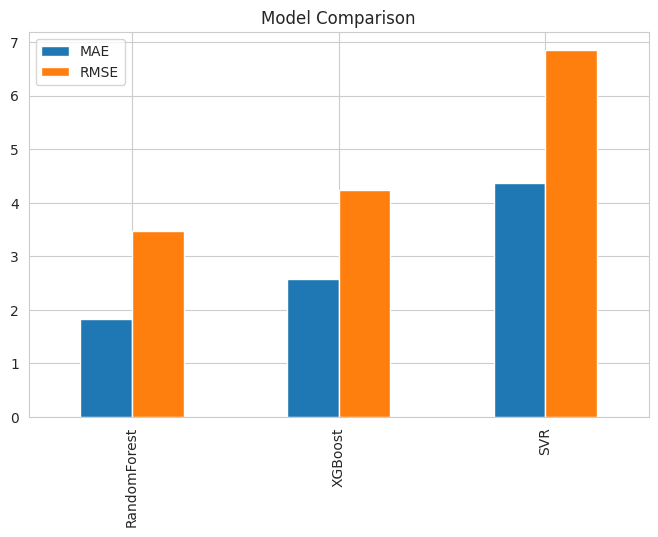

/usr/local/lib/python3.11/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning: plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.

  warnings.warn(


/usr/local/lib/python3.11/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




/usr/local/lib/python3.11/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [9]:
res_df = pd.DataFrame(results).T
print(res_df)

# Bar metrics
res_df[['MAE','RMSE']].plot(kind='bar', figsize=(8,5), title='Model Comparison')
plt.show()

# Prediction vs Actual, Residuals
for name, pipe in fitted.items():
    pred = pipe.predict(X_test)
    fig = go.Figure([
        go.Scatter(x=y_test, y=pred, mode='markers', name='Pred vs Actual'),
        go.Line(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], name='Ideal')
    ])
    fig.update_layout(title=f'{name}: Actual vs Predicted', xaxis_title='Actual', yaxis_title='Predicted')
    fig.show()

    res = y_test - pred
    fig2 = go.Figure([go.Histogram(x=res, nbinsx=40)])
    fig2.update_layout(title=f'{name}: Residuals Distribution', xaxis_title='Residual', yaxis_title='Count')
    fig2.show()


In [10]:
best_name = res_df['MAE'].idxmin()
best_pipe = fitted[best_name]
print(f"Best model: {best_name}")

joblib.dump(best_pipe, 'best_f1_model.pkl')


Best model: RandomForest


['best_f1_model.pkl']

In [11]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
import joblib

# Load trained pipeline
best_pipe = joblib.load('best_f1_model.pkl')

# Most important features used for prediction (update according to your feature importance analysis)
important_features = ['grid', 'laps', 'milliseconds', 'fastestLapSpeed', 'driverRef', 'constructorRef']

# Split into numeric and categorical
num_feats = ['grid', 'laps', 'milliseconds', 'fastestLapSpeed']
cat_feats = ['driverRef', 'constructorRef']

# Define range and types for numeric features
feature_info = {
    'grid': {'min': 1, 'max': 20, 'step': 1},
    'laps': {'min': 1, 'max': 80, 'step': 1},
    'milliseconds': {'min': 0, 'max': 2_000_000, 'step': 10000},
    'fastestLapSpeed': {'min': 150, 'max': 370, 'step': 1},
}

# Widgets dictionary
input_widgets = {}

# Create numeric widgets
for feat in num_feats:
    info = feature_info[feat]
    input_widgets[feat] = widgets.BoundedFloatText(
        description=feat,
        min=info['min'],
        max=info['max'],
        step=info['step'],
        style={'description_width': '150px'},
        layout=widgets.Layout(width='350px')
    )

# Create categorical widgets using values from original dataset X
for feat in cat_feats:
    input_widgets[feat] = widgets.Dropdown(
        description=feat,
        options=sorted(X[feat].dropna().unique().tolist()),  # assuming 'X' is still available in your notebook
        style={'description_width': '150px'},
        layout=widgets.Layout(width='350px')
    )

# Button and output
predict_btn = widgets.Button(description=" Predict Position", button_style='success')
output = widgets.Output()

def on_click(btn):
    with output:
        clear_output()
        try:
            # Collect input values
            input_vals = {feat: [widget.value] for feat, widget in input_widgets.items()}
            df_input = pd.DataFrame(input_vals)

            # Prediction
            prediction = best_pipe.predict(df_input)[0]
            print(f" **Predicted Finishing Position:** {prediction:.1f}")

            # Try to show actual value (if possible — e.g., if a matching row exists in X)
            mask = (X[important_features] == df_input.iloc[0]).all(axis=1)
            if mask.sum() > 0:
                actual = y[mask].values[0]
                print(f" **Actual Finishing Position:** {actual}")
            else:
                print(" No matching race record found to display actual position.")

        except Exception as e:
            print(f" Error: {e}")

predict_btn.on_click(on_click)

# UI layout
input_fields = [widgets.HBox([input_widgets[feat]]) for feat in important_features]
ui_layout = widgets.VBox(input_fields + [predict_btn, output])
display(ui_layout)


In [ ]:
import pandas as pd
import numpy as np
import joblib
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load data
dtype_spec = {'position': 'float64', 'grid': 'float64', 'positionOrder': 'float64', 'points': 'float64', 'laps': 'float64'}
train_df = pd.read_csv('f1/train.csv', dtype=dtype_spec, low_memory=False)
test_df = pd.read_csv('f1/test.csv', dtype=dtype_spec, low_memory=False)

# Feature engineering
def engineer_features(df):
    df = df.copy()
    if all(c in df for c in ['forename', 'year']):
        df['driver_exp'] = df.groupby('forename')['year'].rank(method='dense')
    if all(c in df for c in ['company', 'year']):
        df['team_exp'] = df.groupby('company')['year'].rank(method='dense')
    if all(c in df for c in ['grid', 'positionOrder']):
        df['qual_gap'] = df['grid'] - df['positionOrder']
    if all(c in df for c in ['forename', 'circuitId', 'year']):
        df['track_familiarity'] = df.groupby(['forename', 'circuitId'])['year'].rank(method='dense')
    return df

train_df = engineer_features(train_df)
test_df = engineer_features(test_df)

# Define columns to drop
drop_cols = [
    'resultId', 'racerId', 'driverId', 'constructorId', 'url', 'time_x', 'time_y',
    'statusId', 'number', 'driver_num', 'driver_code', 'positionText_y',
    'url_x', 'url_y', 'driverStandingsId', 'raceId_y', 'result_driver_standing',
    'driverRef', 'constructorRef', 'position_x', 'timetaken_in_millisec',
    'fp1_date', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date',
    'quali_time', 'sprint_date', 'sprint_time', 'dob'
]

# Prepare training data
X = train_df.drop(drop_cols + ['position'], axis=1, errors='ignore')
y = train_df['position']

# Prepare test data
X_test_final = test_df.drop(drop_cols, axis=1, errors='ignore')
for col in set(X.columns) - set(X_test_final.columns):
    X_test_final[col] = 0 if col in X.select_dtypes(include=['number']).columns else X[col].mode()[0]
X_test_final = X_test_final[X.columns]

# Define numerical and categorical features
num_feats = X.select_dtypes(include=['number']).columns.tolist()
cat_feats = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipelines
num_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])
cat_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', num_pipe, num_feats),
    ('cat', cat_pipe, cat_feats)
], remainder='passthrough')

# Train model
best_model = RandomForestRegressor(random_state=42, n_jobs=-1)
best_pipe = Pipeline([('pre', preprocessor), ('m', best_model)])
best_pipe.fit(X, y)

# Save model and preprocessor
joblib.dump(best_pipe, 'best_f1_model.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')

# Predict on test data
predictions = best_pipe.predict(X_test_final)
print("Test set predictions:", predictions[:5])

# User-defined prediction interface
feature_info = {
    'grid': {'min': 1, 'max': 20, 'step': 1},
    'laps': {'min': 1, 'max': 80, 'step': 1},
    'milliseconds': {'min': 0, 'max': 2_000_000, 'step': 10000},
    'fastestLapSpeed': {'min': 150, 'max': 370, 'step': 1},
    'year': {'min': 1950, 'max': 2025, 'step': 1},
    'round': {'min': 1, 'max': 25, 'step': 1},
    'points': {'min': 0, 'max': 50, 'step': 1},
    'driver_exp': {'min': 1, 'max': 50, 'step': 1},
    'team_exp': {'min': 1, 'max': 50, 'step': 1},
    'qual_gap': {'min': -20, 'max': 20, 'step': 1},
    'track_familiarity': {'min': 1, 'max': 50, 'step': 1},
}

input_widgets = {}
for feat in num_feats:
    info = feature_info.get(feat, {'min': 0, 'max': 100, 'step': 1})
    input_widgets[feat] = widgets.BoundedFloatText(
        description=feat,
        min=info['min'],
        max=info['max'],
        step=info['step'],
        style={'description_width': '150px'},
        layout=widgets.Layout(width='350px')
    )
for feat in cat_feats:
    input_widgets[feat] = widgets.Dropdown(
        description=feat,
        options=sorted(X[feat].dropna().unique().tolist()),
        style={'description_width': '150px'},
        layout=widgets.Layout(width='350px')
    )

predict_btn = widgets.Button(description="Predict Position", button_style='success')
output = widgets.Output()

def on_click(btn):
    with output:
        clear_output()
        try:
            input_vals = {feat: [widget.value] for feat, widget in input_widgets.items()}
            df_input = pd.DataFrame(input_vals)
            for col in set(X.columns) - set(df_input.columns):
                df_input[col] = X[col].median() if col in num_feats else X[col].mode()[0]
            df_input = df_input[X.columns]
            prediction = best_pipe.predict(df_input)[0]
            print(f" **Predicted Finishing Position:** {prediction:.1f}")
        except Exception as e:
            logger.error(f"Prediction error: {e}")
            print(f" Error: {e}")

predict_btn.on_click(on_click)
input_fields = [widgets.HBox([input_widgets[feat]]) for feat in X.columns]
ui_layout = widgets.VBox(input_fields + [predict_btn, output])
display(ui_layout)

In [ ]:
# Get feature importances (only numeric + complete features)
X_transformed = X.dropna()
y_transformed = y[X_transformed.index]

# Re-train a RandomForest on complete data to evaluate feature importance
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rf.fit(X_transformed.select_dtypes(include='number'), y_transformed)

# Get importances
feat_importance = pd.Series(rf.feature_importances_, index=X_transformed.select_dtypes(include='number').columns)
important_features = feat_importance.sort_values(ascending=False).head(6).index.tolist()
print("Selected features:", important_features)


Selected features: ['points_y', 'driverStandingsId', 'raceId_y', 'year', 'wins', 'result_driver_standing']


In [ ]:
def on_click(btn):
    with output:
        clear_output()
        try:
            input_vals = {feat: [widget.value] for feat, widget in input_widgets.items()}
            df_input = pd.DataFrame(input_vals)

            prediction = best_pipe.predict(df_input)[0]
            print(f" **Predicted Finishing Position:** {prediction:.1f}")

            # Lookup for actual result in original training data
            mask = np.ones(len(X), dtype=bool)
            for feat in important_features:
                mask &= np.isclose(X[feat], df_input[feat].values[0], rtol=0.01, atol=1e-3)

            if mask.sum() > 0:
                actual = y[mask].values[0]
                print(f" **Actual Finishing Position:** {actual}")
            else:
                print(" No exact match found to display actual position.")

        except Exception as e:
            print(f" Error: {e}")
